# Hotel Reservations Classification

### Background:

- In this project, a model that predicts if a potential hotel guest will keep or cancel the hotel reservation will be built.  Several independent variables will be involved to predict the target variable, "booking_status".

### Context:
- "The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with." For additional information on the dataset, please see the source at: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset. 

### Objectives:

- To predict those hotel reservations that might be canceled by potential guests. 
- Which features are the most important in the model-building process.

### Data Description:

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

## Import Libraries

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/Hotel Reservations.csv')

In [ ]:
hr = hotel.copy()

## Viewing the first and last 5 rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
hr.head(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# let's view the last 5 rows of the data
hr.tail(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

## Shape of dataset

In [ ]:
# Checking the number of rows and columns in the data
hr.shape

(36275, 19)

#### Observation:
- There are 36275 rows (observations) and 19 columns (features) in the dataset.

In [ ]:
# let's check the data types of the columns in the dataset
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observation:
- There are no null (missing) values in the dataset.
- There are 13 integer data type variables.
- There is one float data type variables.
- There are five object type variables which can be converted to "category" type, this reduces the data space.

In [ ]:
# let's check for duplicate values in the data
hr.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(hr.isnull().sum() / hr.isnull().count() * 100, 2)

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

#### Observation:
- There are no missing values.

## Converting Data Types

In [ ]:
cols = hr.select_dtypes(['object'])
cols.columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    hr[i] = hr[i].astype('category')

In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

#### Observation:
- We can see that the memory usage has decreased from 5.3+ MB to 5.4 MB.
- This technique is specially useful for larger datasets.

## Summary of Features

In [ ]:
hr.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

#### Observation:
- The average number of adults in a reservation is ~2.
- The average number of week nights reserved is ~2.
- The lead_time variable is right skewed based on the 75% and max percentile difference.
- On average reservations are made about the 7th month of the year, July.
- On average the arrival date is approximately the 15th, mid-month.
- The max number of cancellations for a given guest is 13.
- The average price per room is ~103.42.
- The avg_price_per_room variable is right skewed based on the 75% and max percentile difference.

In [ ]:
hr.describe(include=['category']).T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

#### Observation:
- There is 36,275 unique Booking_ID.
- The majority of guests enjoy Meal Plan 1.
- The majority of room_type_reserved is Room_Type 1.
- The majority of guest utilize online booking.
- The majority of guests making a reservation do not cancel bookings.

### Looking at the unqiue values of all the categories

In [ ]:
cols_cat= hr.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Booking_ID are :
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64
**************************************************
Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
********************

#### Observation:
- There are four unique values in the type_of_meal_plan category.
- The top meal plan is type one and the least popular meal plan is type three.
- There are seven unique values in room_type_reserved.
- The top room type reserved is type one and the least popular room is type three.
- There are five unique values in the variable market_segment_type.
- The majority of bookings are made online market designation, the least number of booking are through aviation market designation.
- The dataset is midly unbalanced, a great portion of bookings are not cancelled.

### Drop Booking_ID as it is unique for each booking and might not add value to modeling.

In [ ]:
hr.drop(["Booking_ID"], axis=1, inplace=True)

# EDA

## Univariate Analysis

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observation on no_of_adults

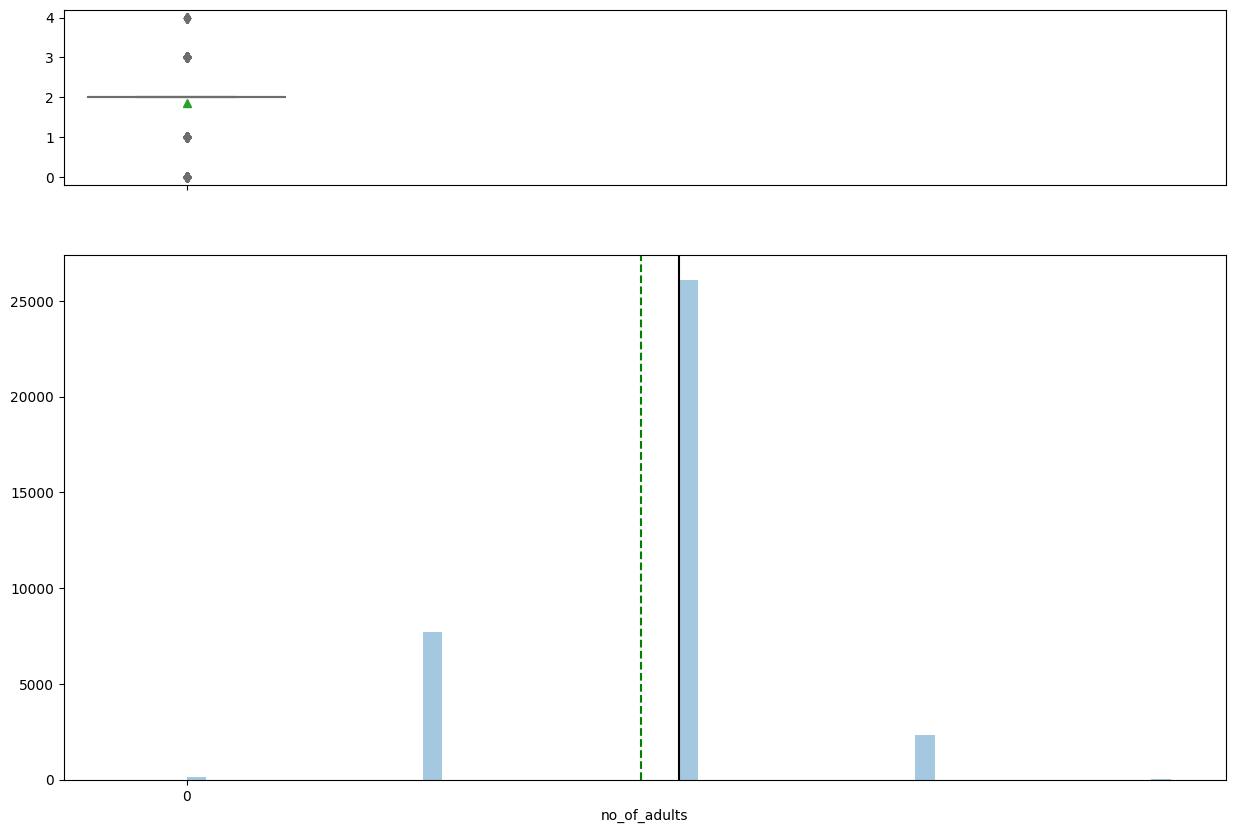

In [ ]:
histogram_boxplot(hr['no_of_adults'])

#### Observation:
- The majority of bookings have two adults.

### Observation on no_of_children

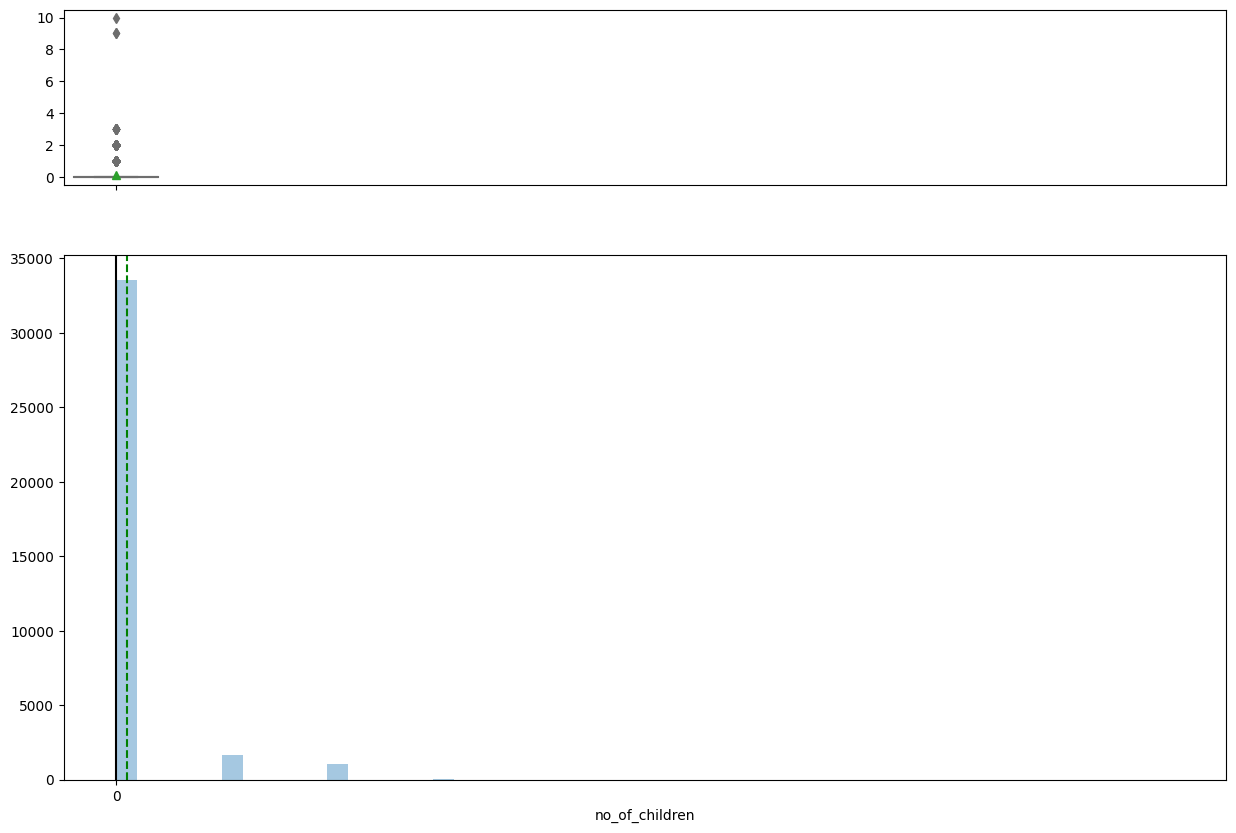

In [ ]:
histogram_boxplot(hr['no_of_children'])

#### Observation:
- The majority of booking do not include any children.
- The second highest number of children in a booking is one.

### Observation on no_of_weekend_nights

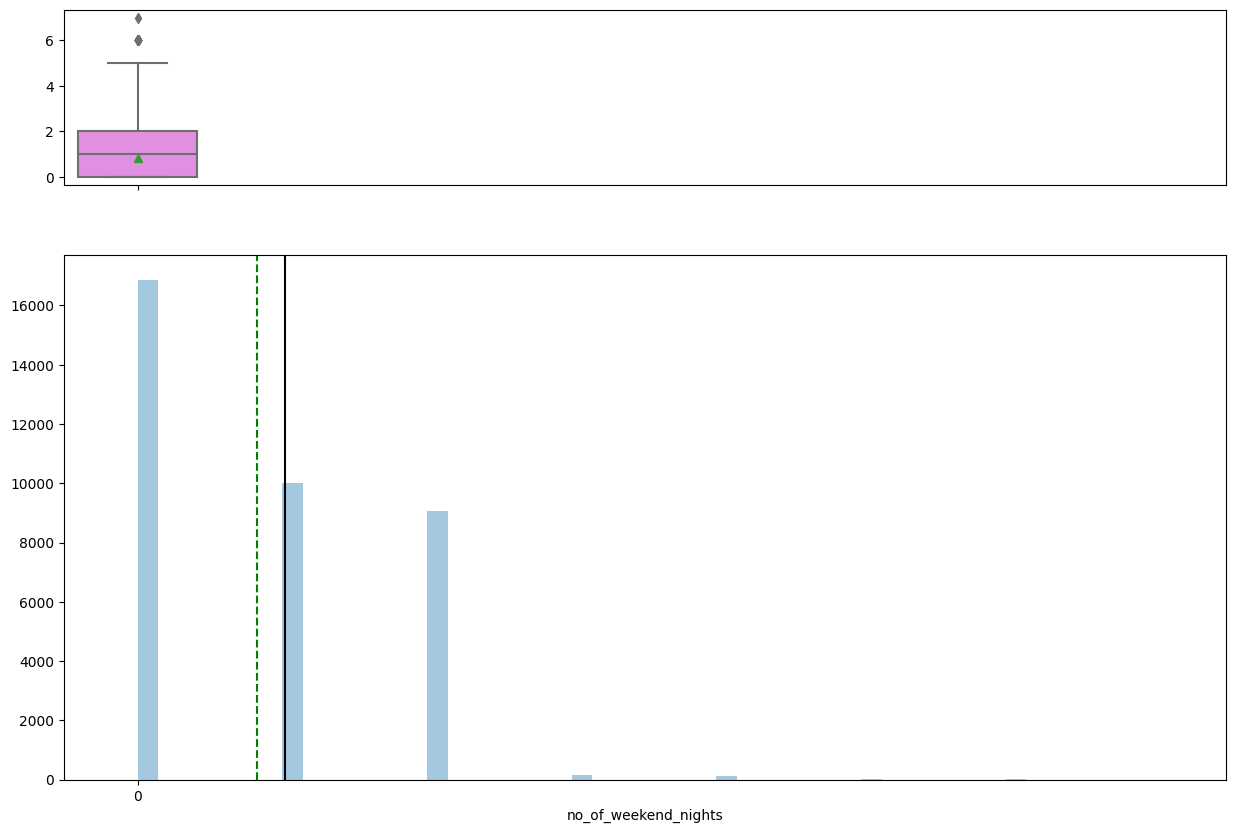

In [ ]:
histogram_boxplot(hr['no_of_weekend_nights'])

#### Observation:
- The majority of bookings have zero bookings on the weekends.
- The variable no_of_weekend_nights is right skewed, and has two outliers.

### Observation on no_of_week_nights

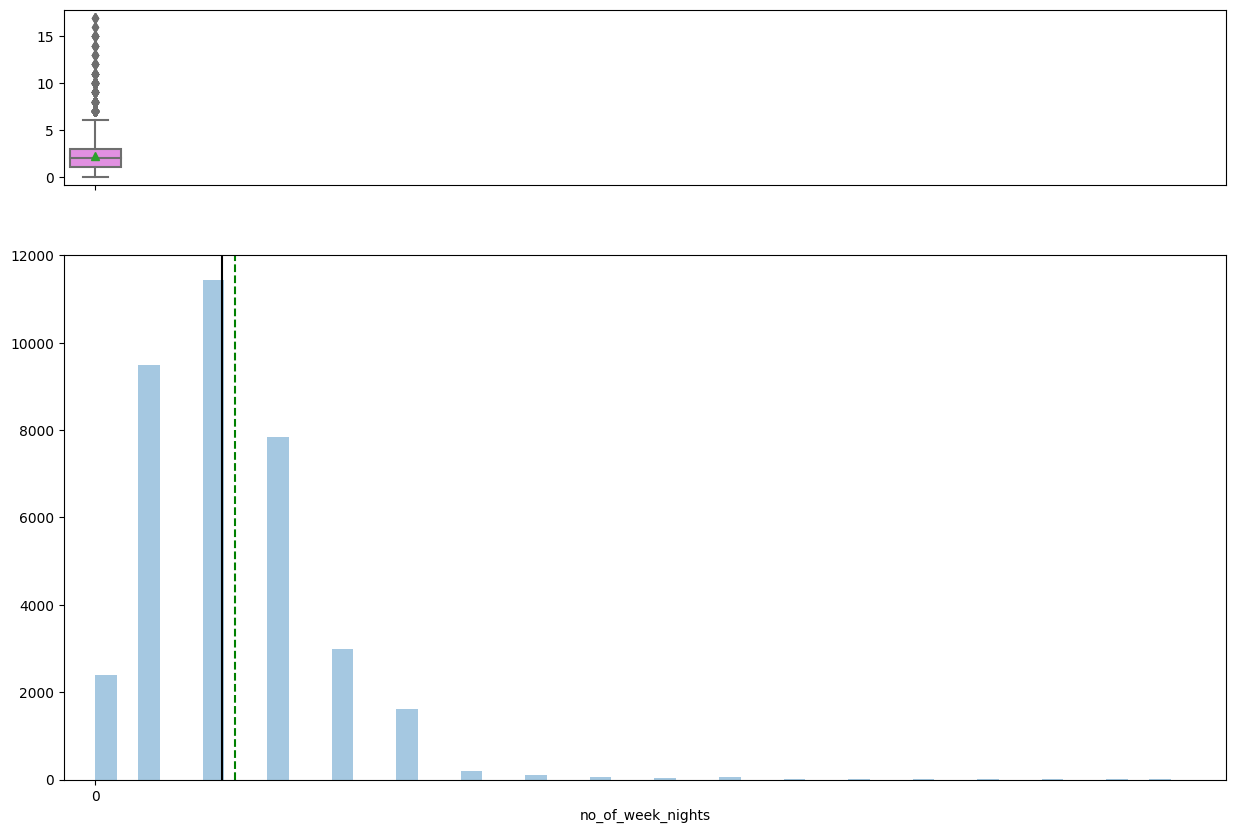

In [ ]:
histogram_boxplot(hr['no_of_week_nights'])

#### Observation:
- The majority of bookings are for two night during the week.
- The variable no_of_week_nights is right skewed, and there are some possible outliers.

### Observation on required_car_parking_space

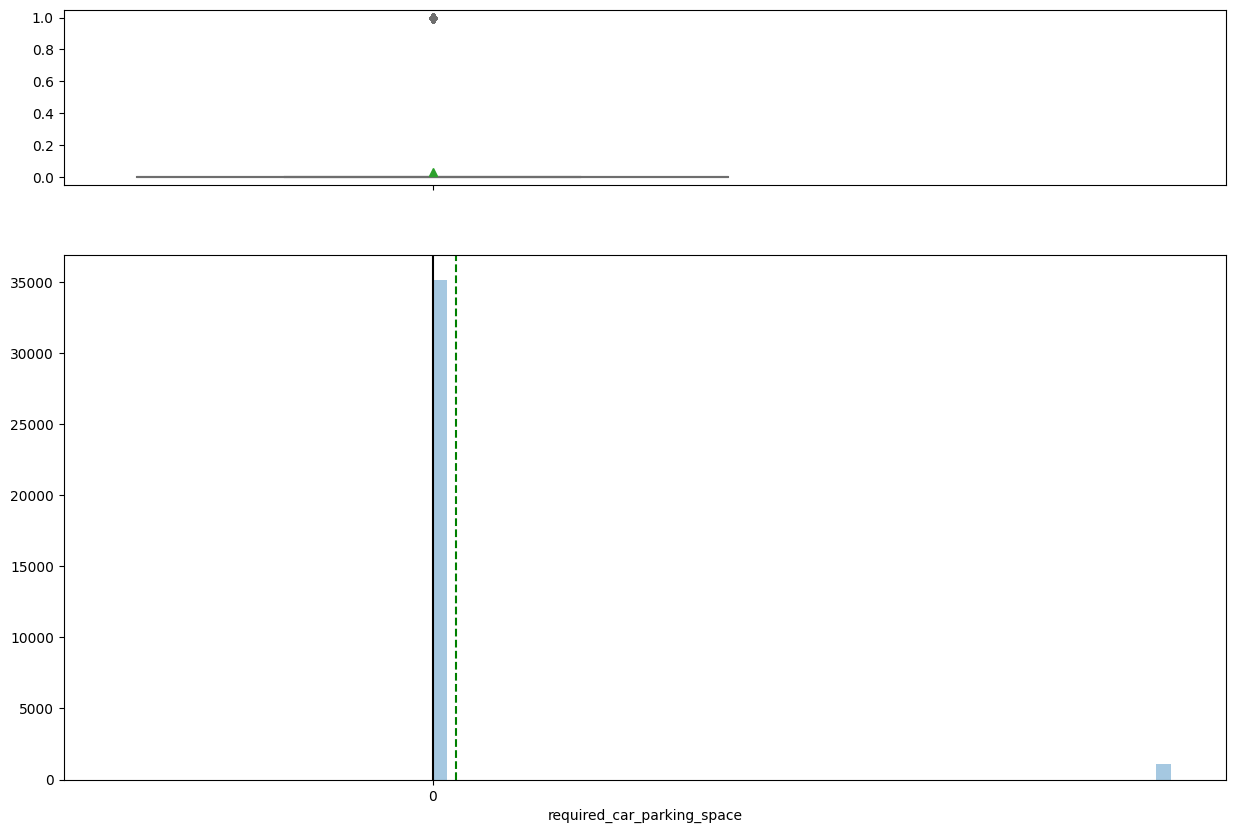

In [ ]:
histogram_boxplot(hr['required_car_parking_space'])

#### Observation:
- The majority of guests who book a stay do not require a parking space.

### Observation on lead_time

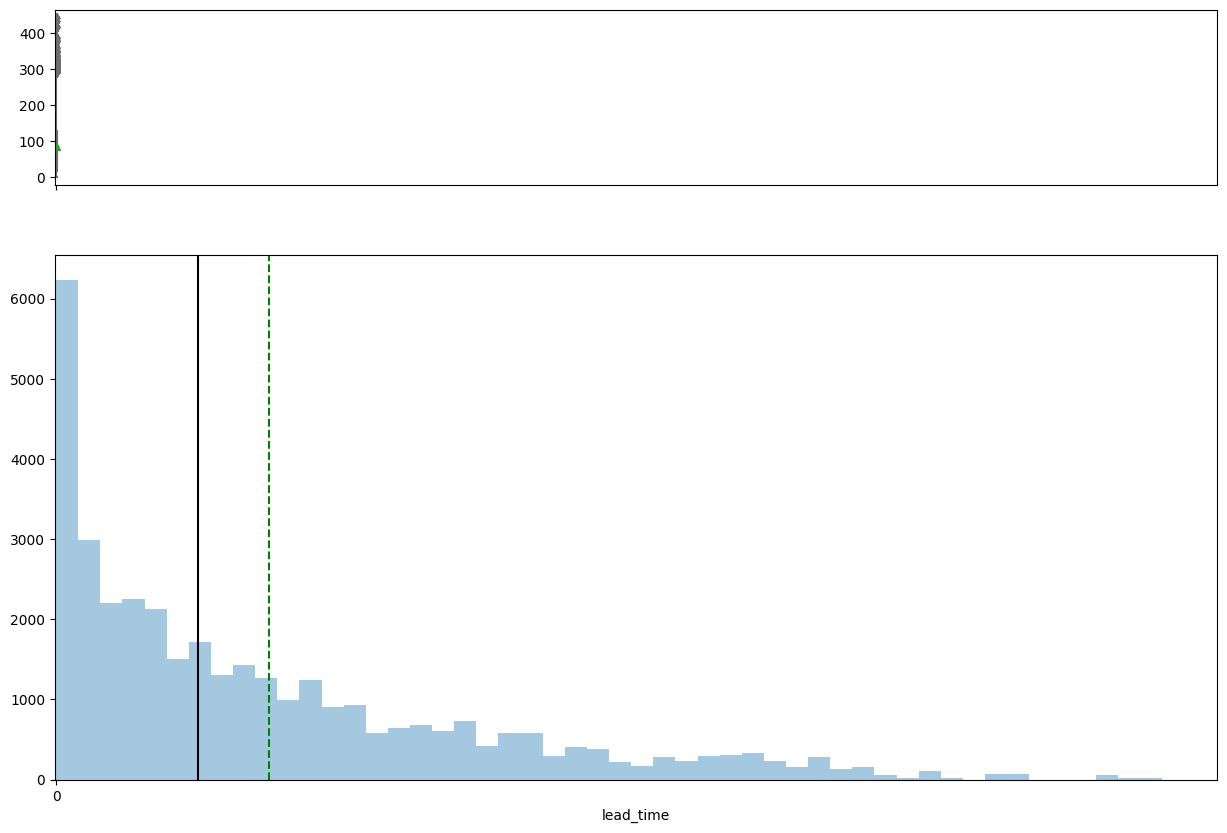

In [ ]:
histogram_boxplot(hr['lead_time'])

#### Observation:
- The top lead time is zero days.
- This variable is highly right-skewed.
- There is many outliers in this varibale, greater than 300 days lead time.

### Observation on arrival_year

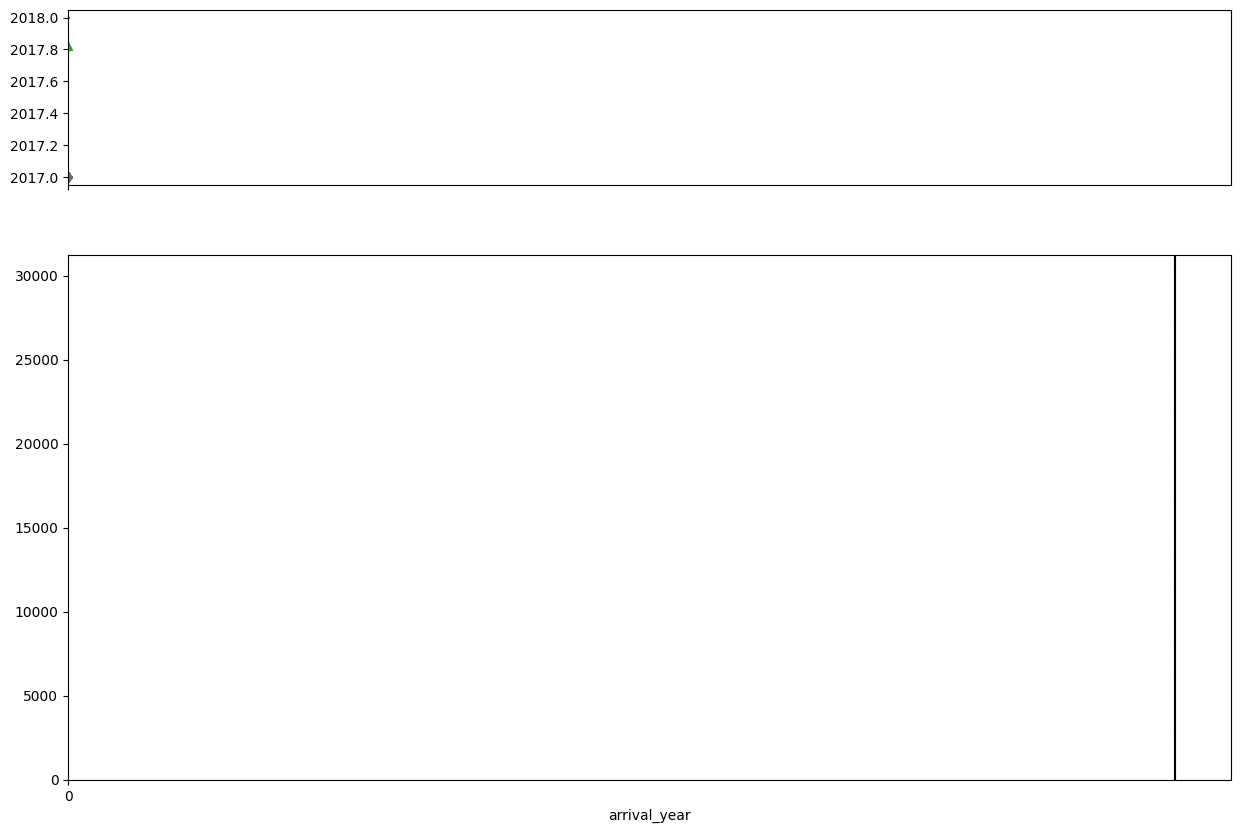

In [ ]:
histogram_boxplot(hr['arrival_year'])

#### Observation:
- The majority of arrivals are in 2018.
- It is possible that many of the bookings occur in 2017 for the 2018 year.

### Observation on arrival_month

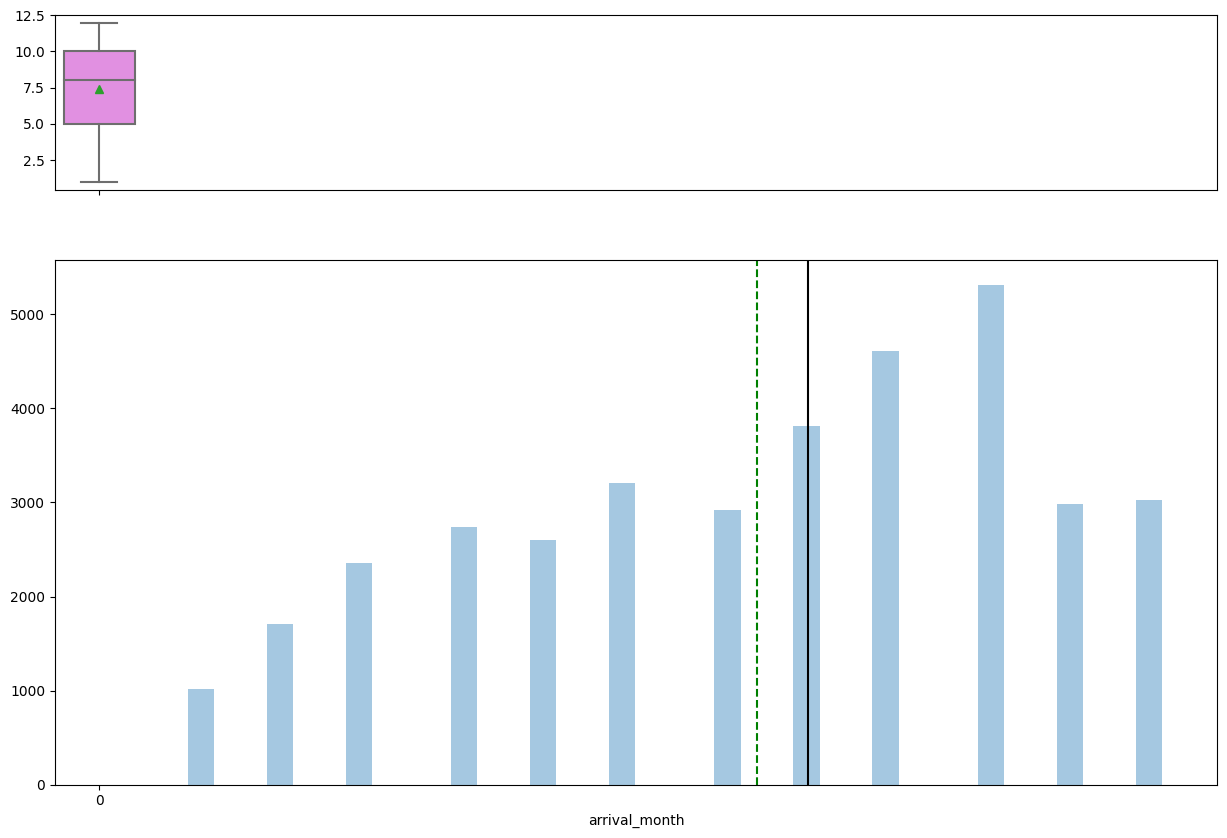

In [ ]:
histogram_boxplot(hr['arrival_month'])

#### Observation:
- The majority of arrivals occur in the month of October.
- The least number of arrivals occur in January.
- The second highest month with arrivals is September.

### Observation on arrival_date

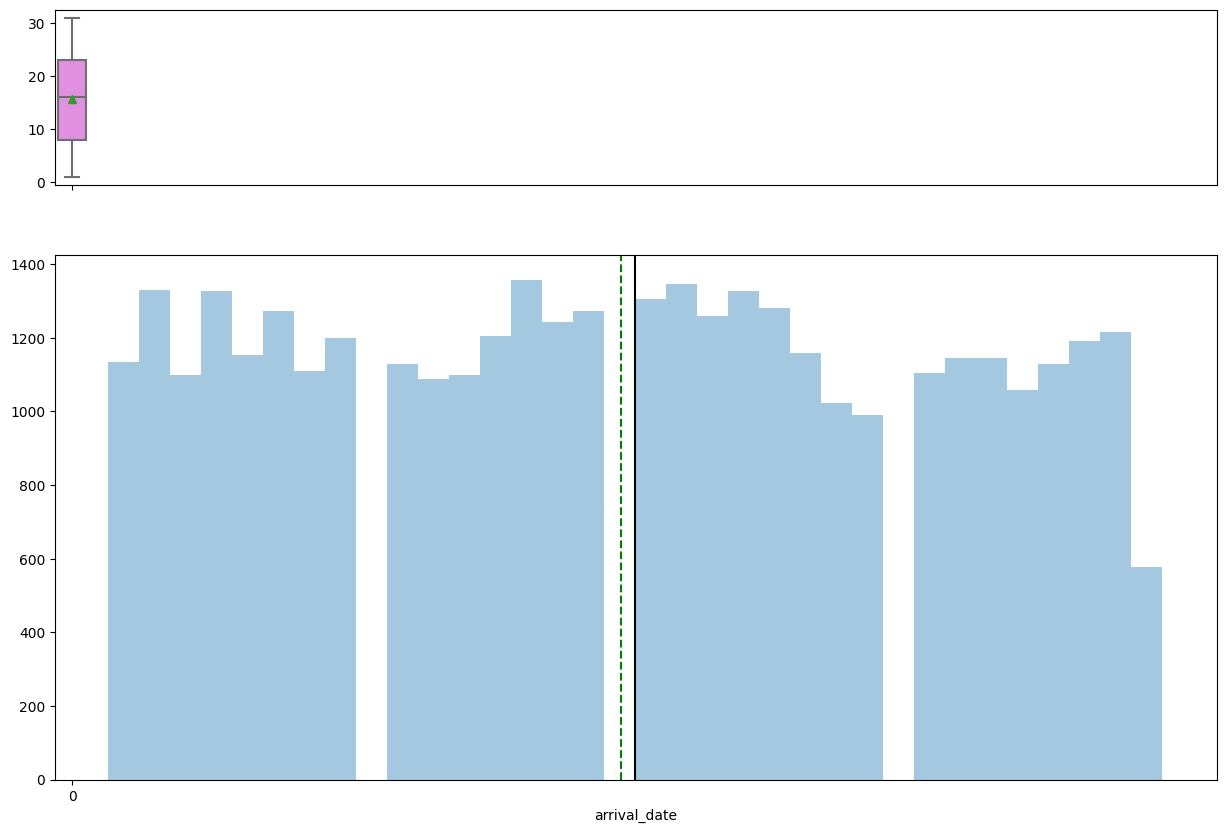

In [ ]:
histogram_boxplot(hr['arrival_date'])

#### Observation:
- The end of the months seem to have less bookings.

### Observation on repeated_guest

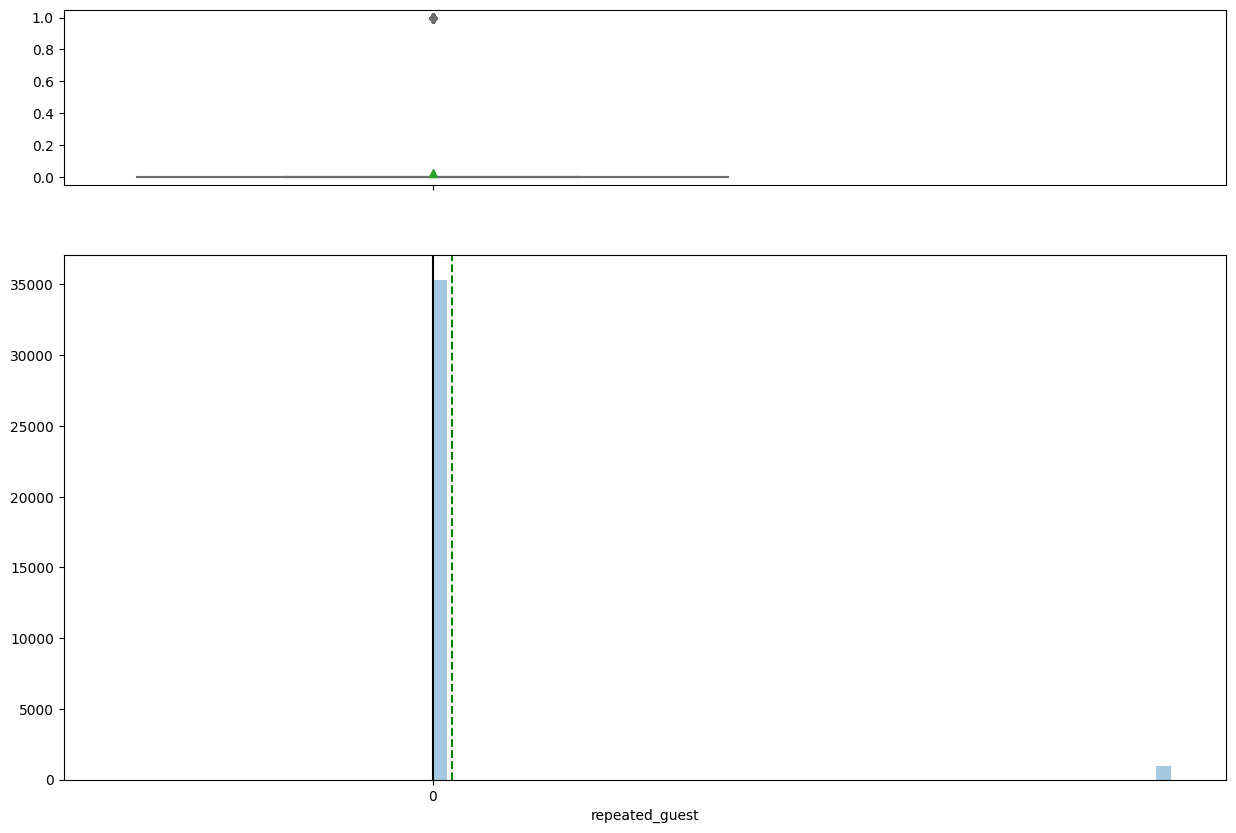

In [ ]:
histogram_boxplot(hr['repeated_guest'])

#### Observation:
- The majority of bookings are from new guests.

### Observation on no_of_previous_cancellations

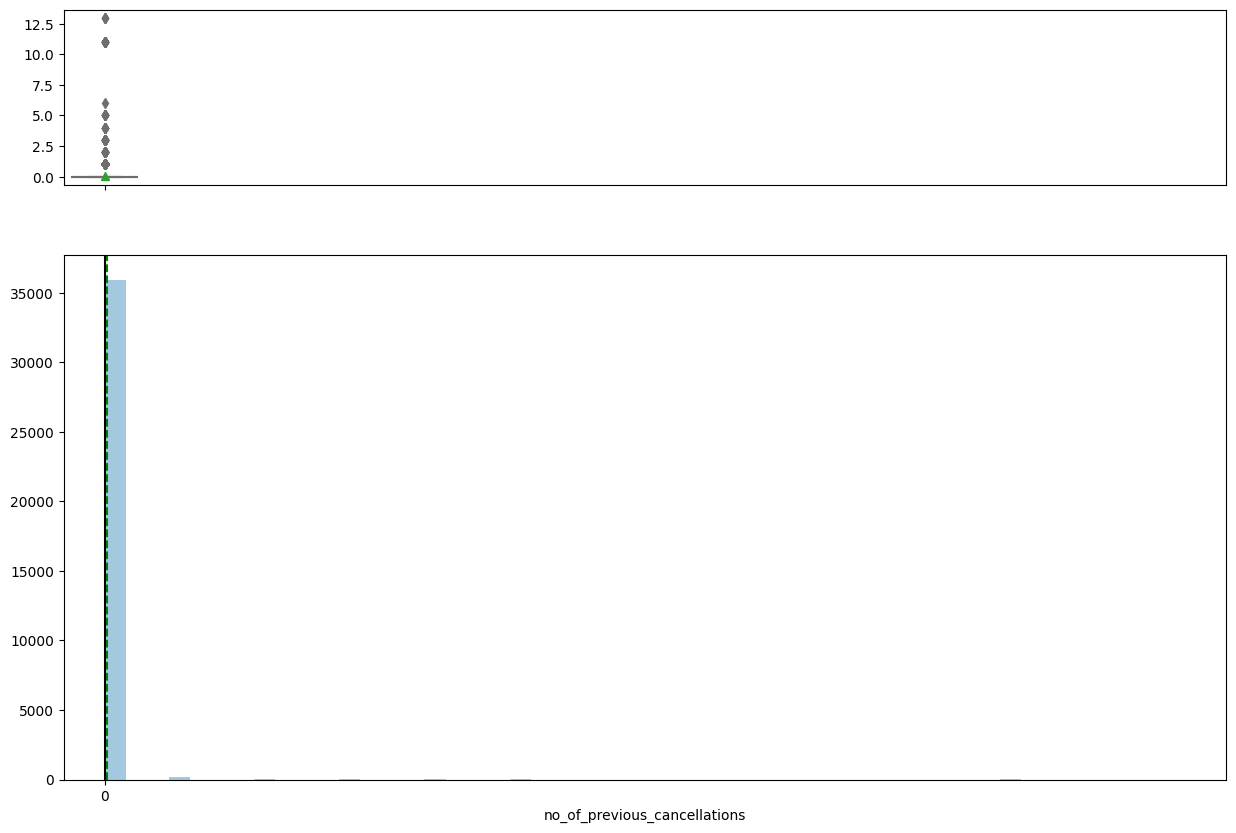

In [ ]:
histogram_boxplot(hr['no_of_previous_cancellations'])

#### Observation:
- The majority of guets have zero previous cancellations.
- There seem to be guests who have more than 6 cancellations who are booking reservations.

### Observation on no_of_previous_bookings_not_canceled

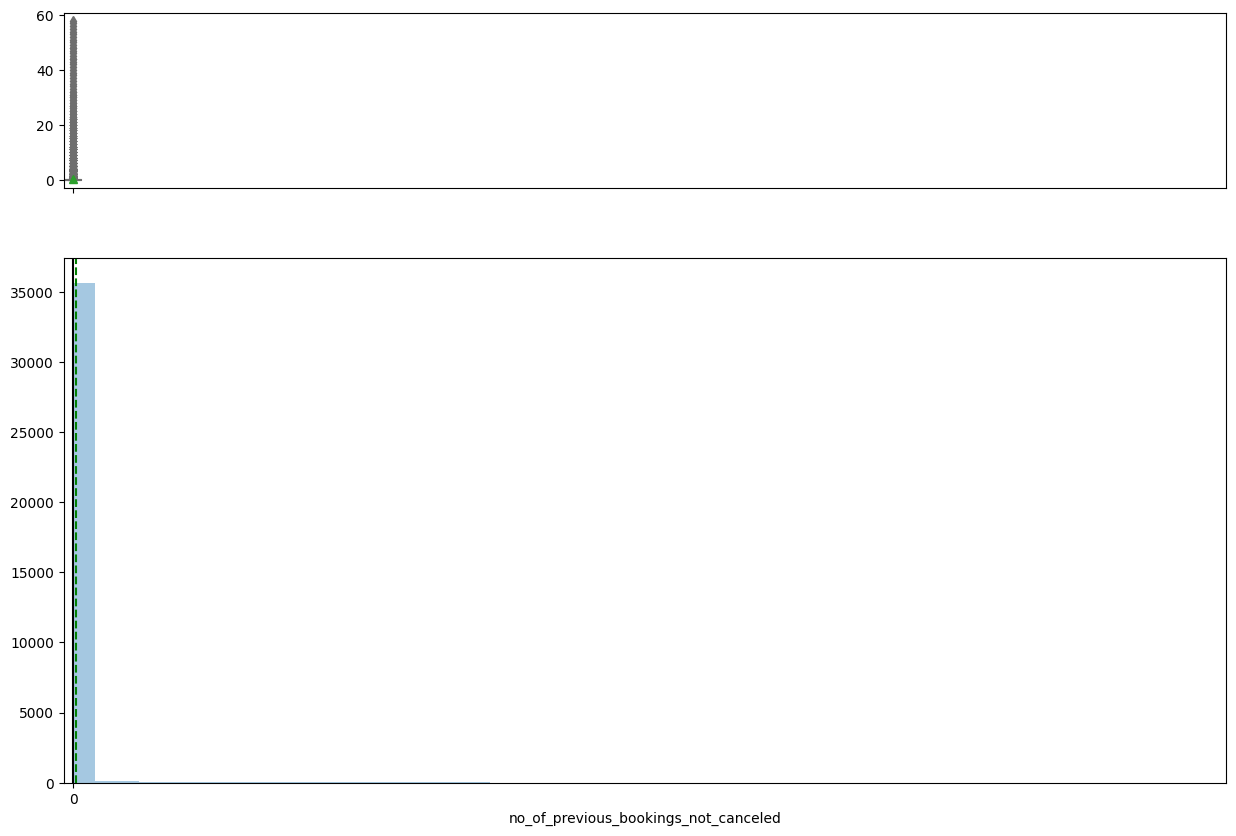

In [ ]:
histogram_boxplot(hr['no_of_previous_bookings_not_canceled'])

#### Observation:
- The majority of guests making reservations have zero previous bookings not canceled by the customer prior to the current booking.

### Observation on avg_price_per_room

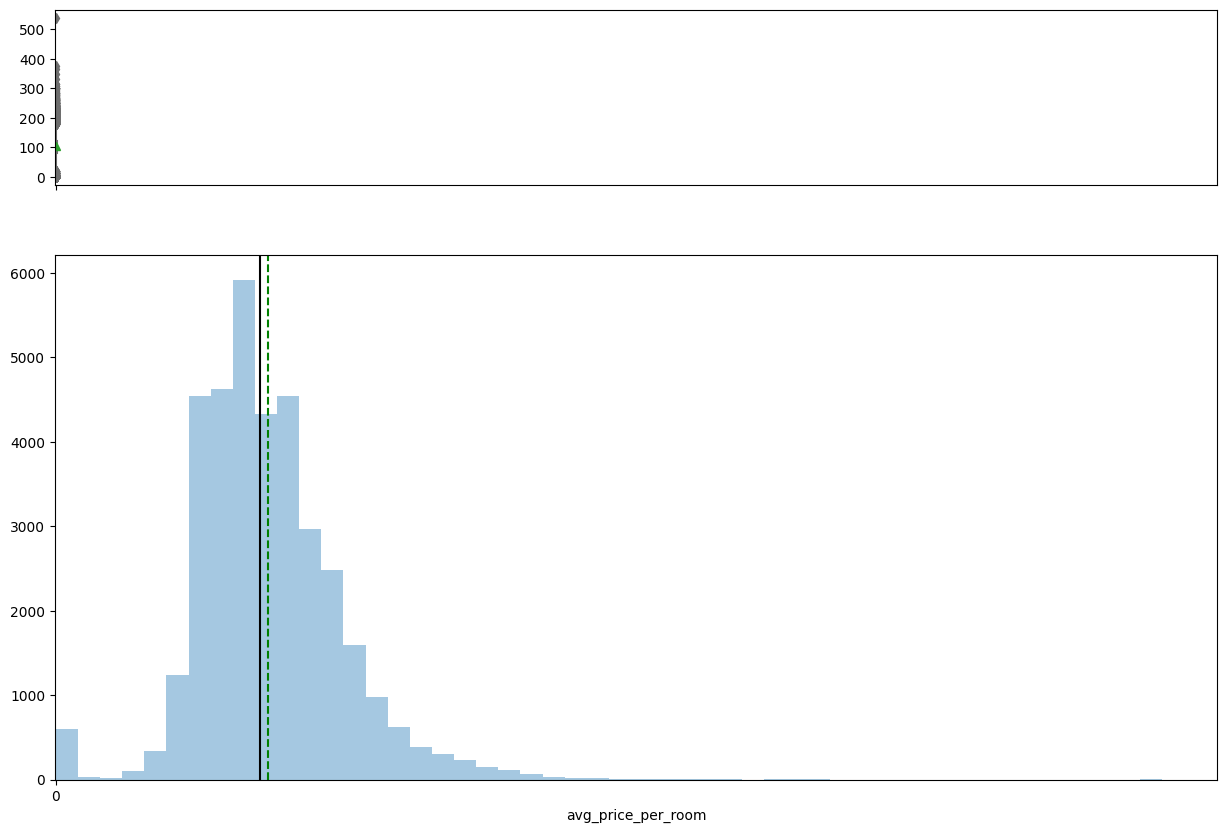

In [ ]:
histogram_boxplot(hr['avg_price_per_room'])

#### Observation:
- The majority of rooms have an average of 99 euros.
- There are outliers, but there is one major outlier that shows a rate of greater than 500 euros.
- The variable is right-skewed.

### Observation on no_of_special_requests

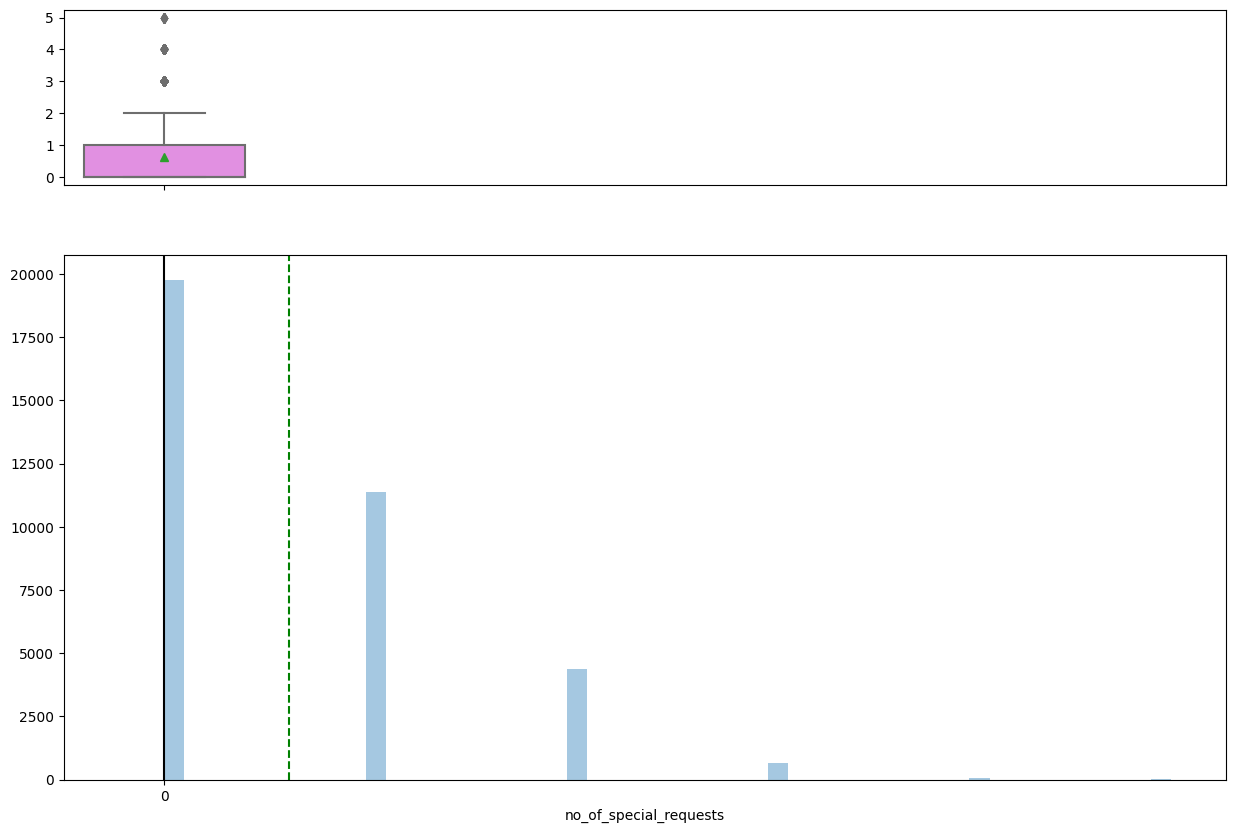

In [ ]:
histogram_boxplot(hr['no_of_special_requests'])

#### Observation:
- The majority of guests booking revervations more zero special requests.
- The variable is right-skewed, some guests have up to five special requests.

## Categorical Features

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

### Observation on type_of_meal_plan

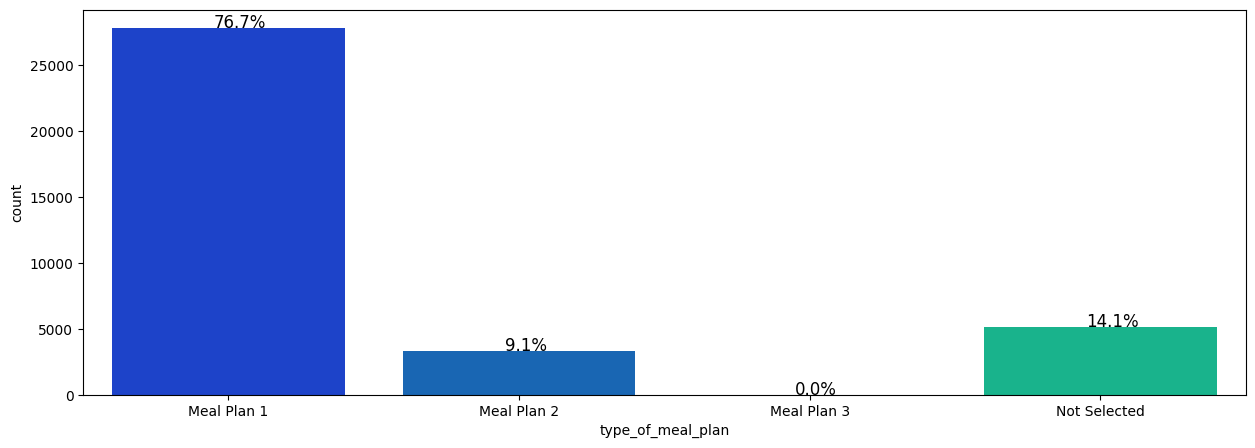

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=hr["type_of_meal_plan"],palette='winter')
perc_on_bar(ax,hr["type_of_meal_plan"])

#### Observation:
- The majority of bookings include Meal Plan 1.
- The second highest majority of bookings do not select a meal plan.
- The third meal plan is the least requested.

### Observation on room_type_reserved

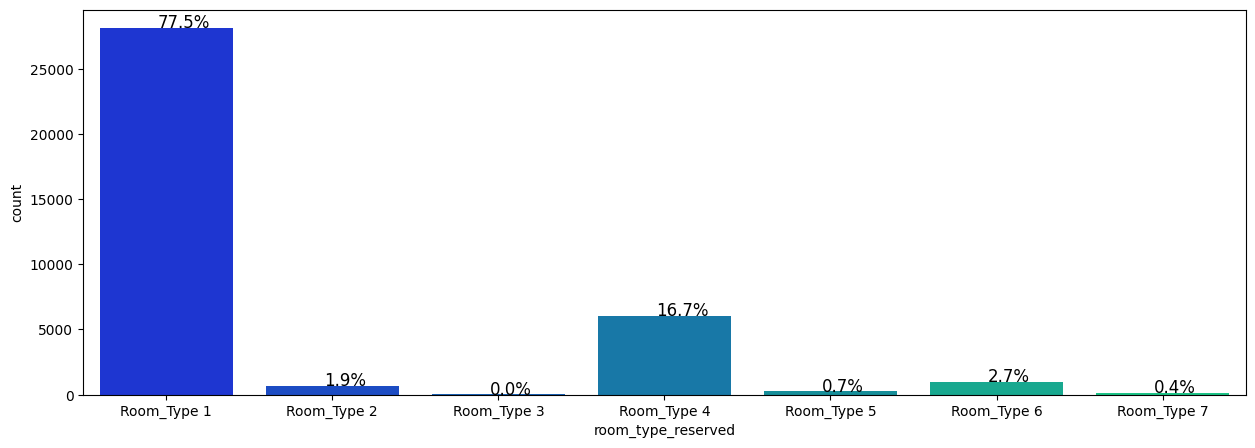

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=hr["room_type_reserved"],palette='winter')
perc_on_bar(ax,hr["room_type_reserved"])

#### Observation:
- The majority of reservations booked Room Type 1.
- The second highest number of reservations booked Room Type 4.
- The least number of requested rooms are Room Type 3.

### Observation on market_segment_type

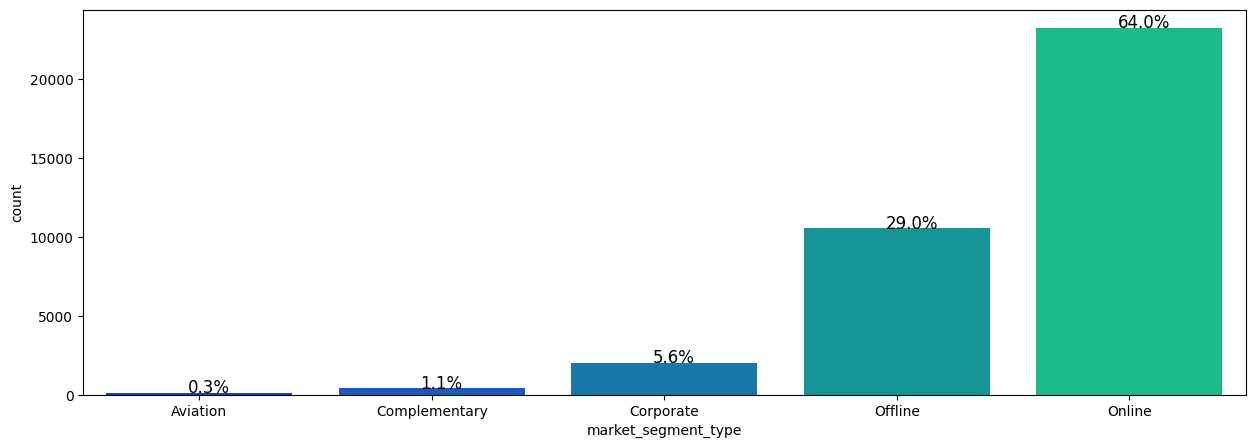

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=hr["market_segment_type"],palette='winter')
perc_on_bar(ax,hr["market_segment_type"])

#### Observation:
- The majority of reservations are through online market segment designation.
- The second highest number of reservations are through offline market segment designation.
- The least number of reservations are through aviation market segment designation.

### Observation on booking_status (Target Variable)

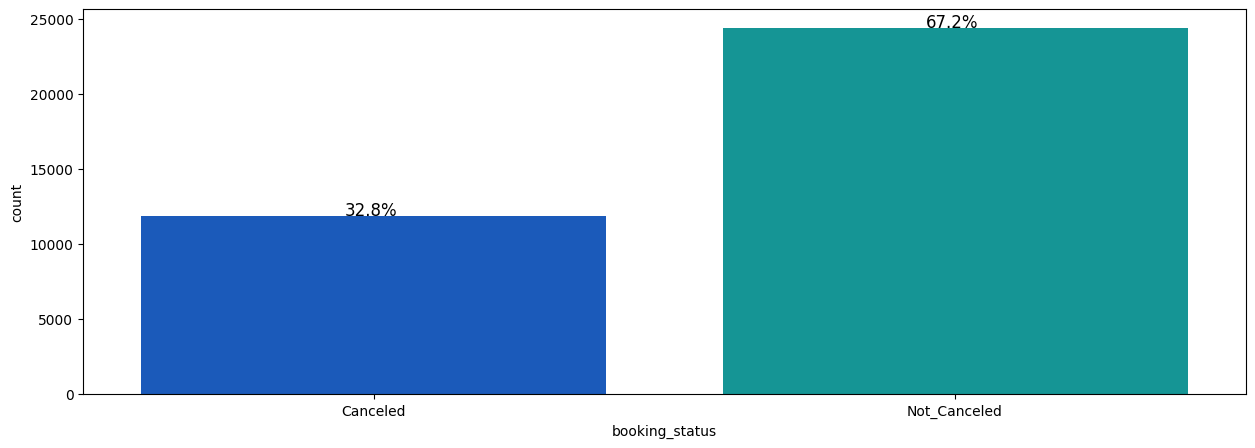

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=hr["booking_status"],palette='winter')
perc_on_bar(ax,hr["booking_status"])

In [ ]:
hr['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

#### Observation:
- A majority of reservations are not canceled.
- The dataset is mildly unbalanced with value not canceled being dominant.

## Bivariate Analysis

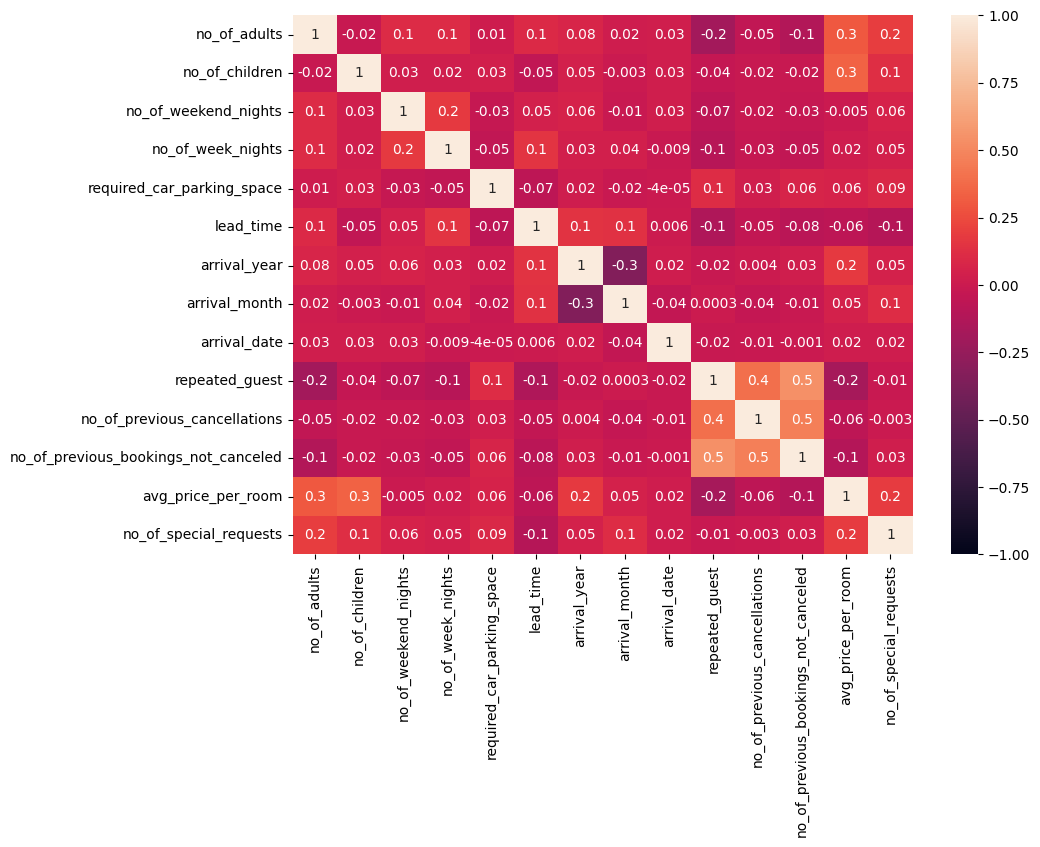

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(hr.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

#### Observation:
- There are no high correlations.
- We have a mid correlations between repeated_guest and no_of_previous_booking_not_canceled variables.
- There is a slight correlation btween repeated_guest and no_of_previous_cancellations.

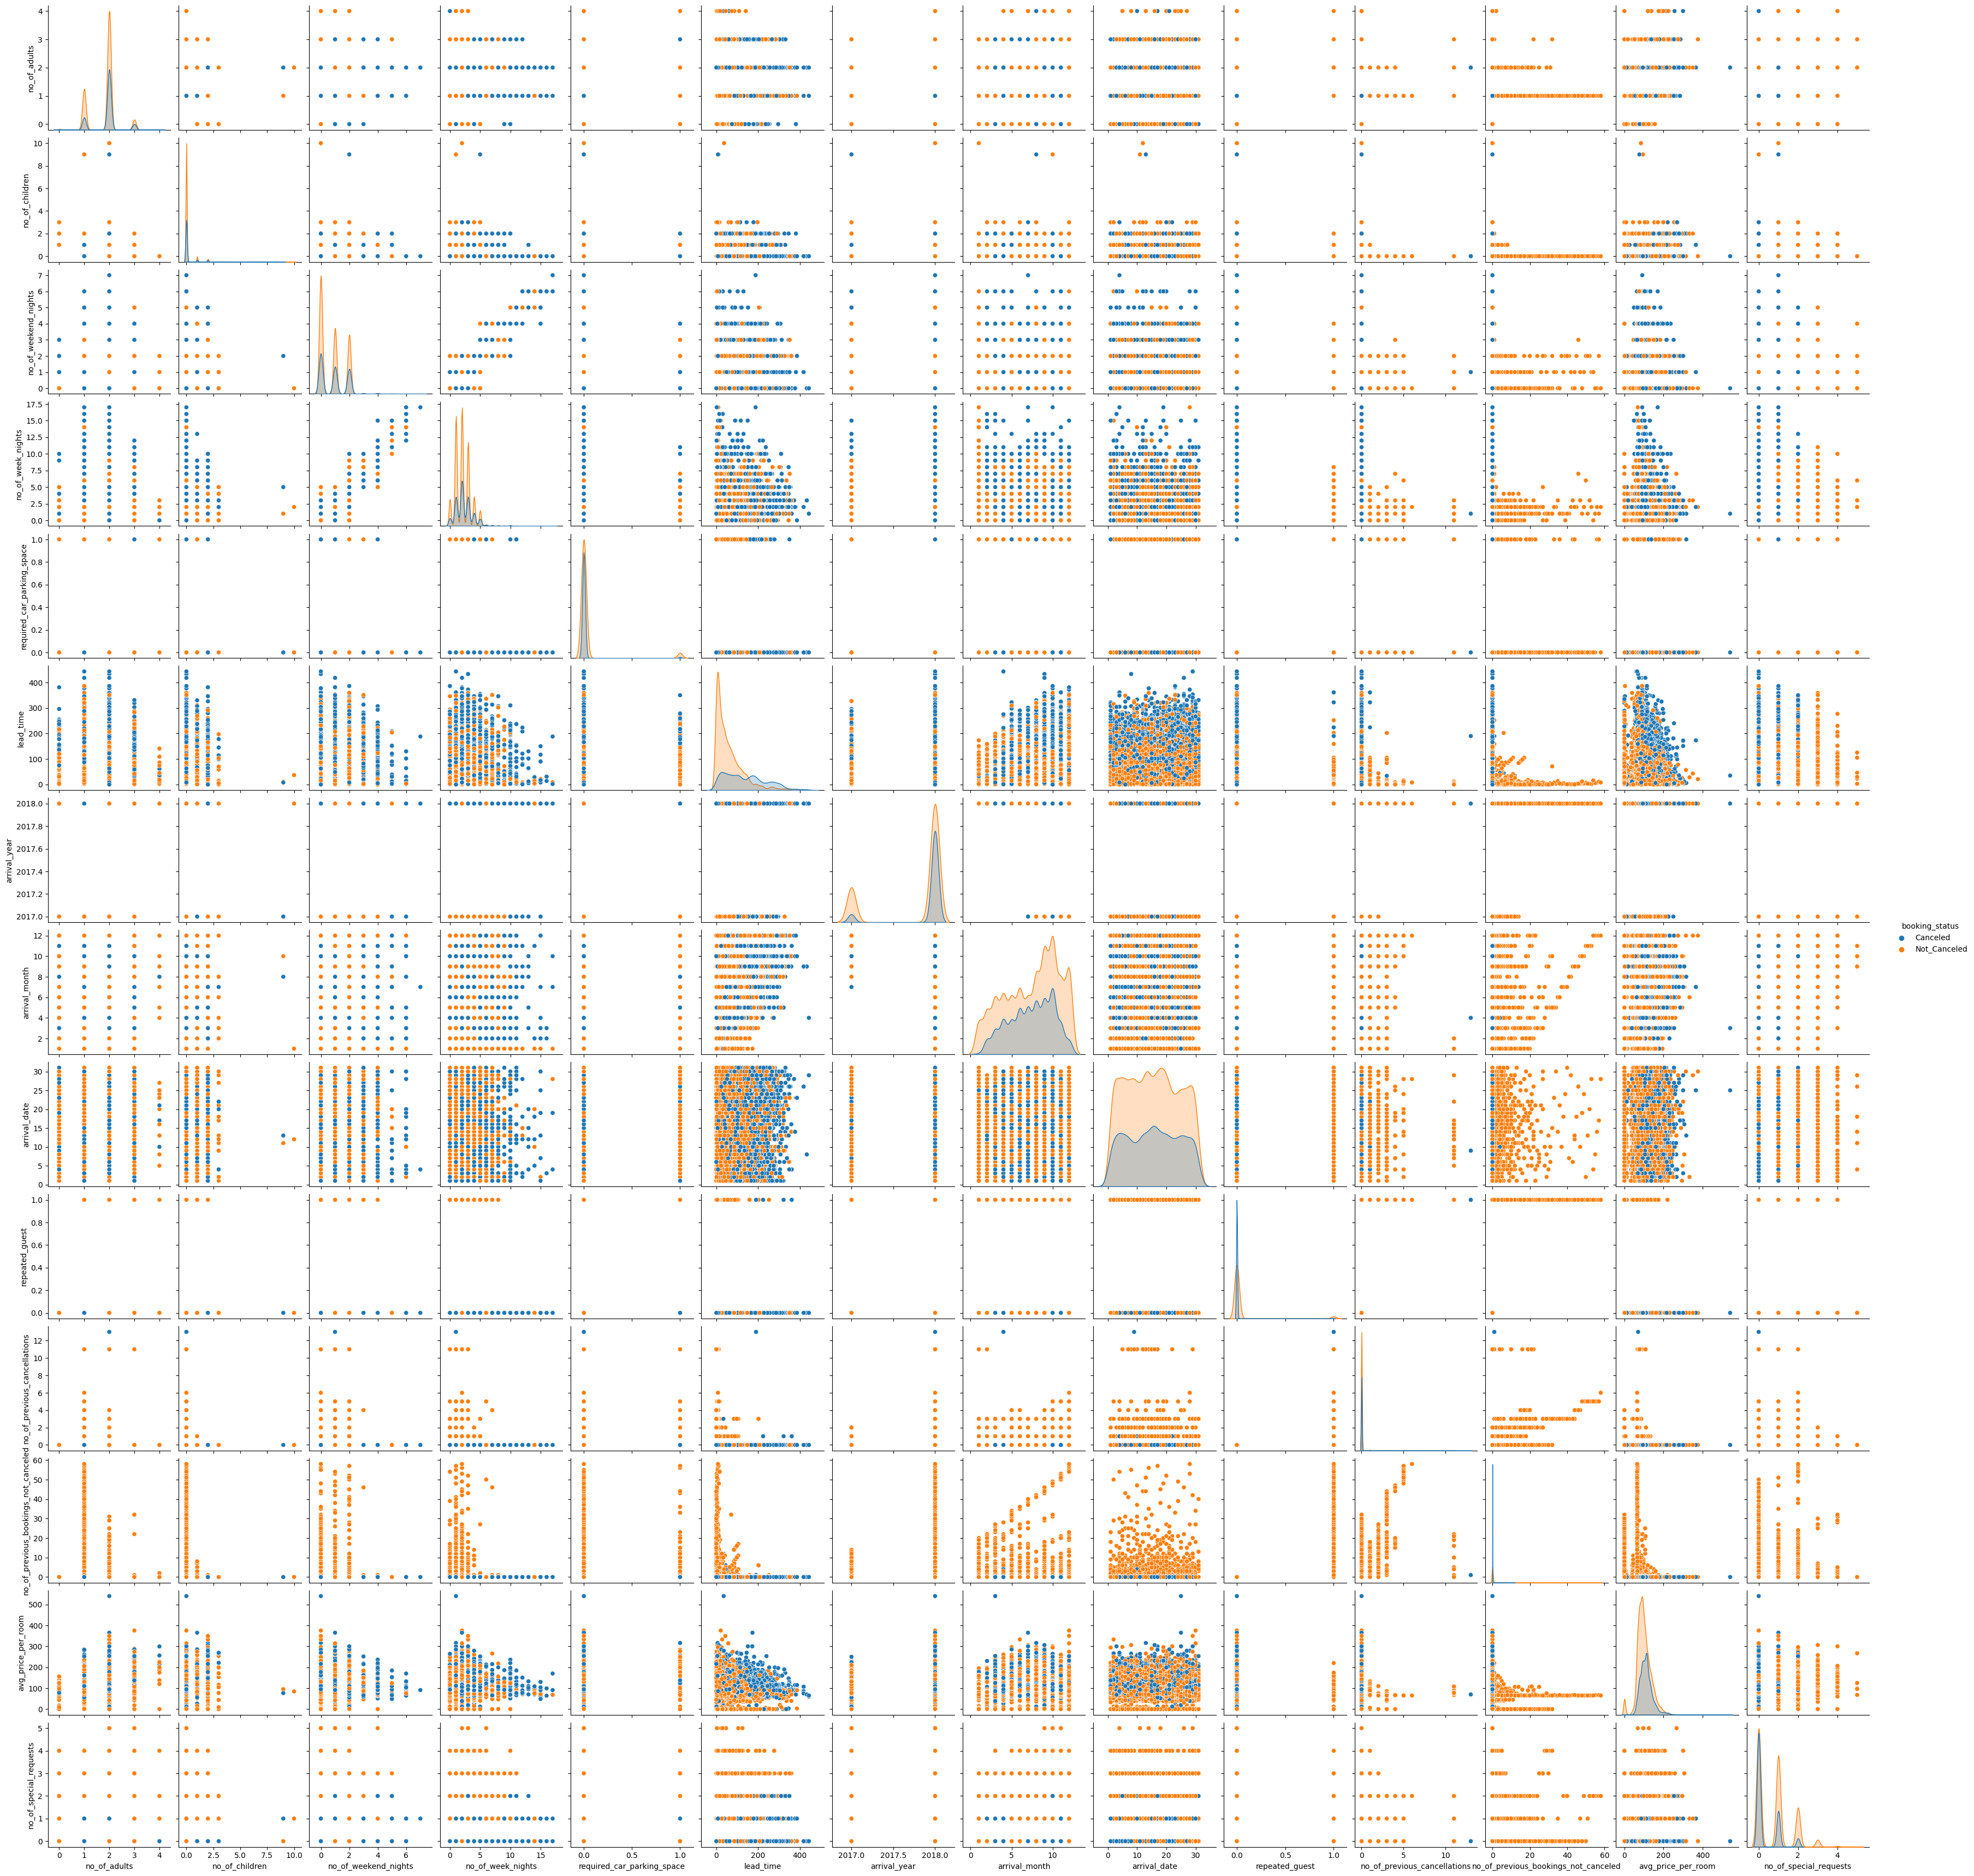

In [ ]:
sns.pairplot(hr,hue='booking_status')
plt.show()

## Comparing the target variable (booking_status) with other variables

### Booking_status vs "no_of_adults"

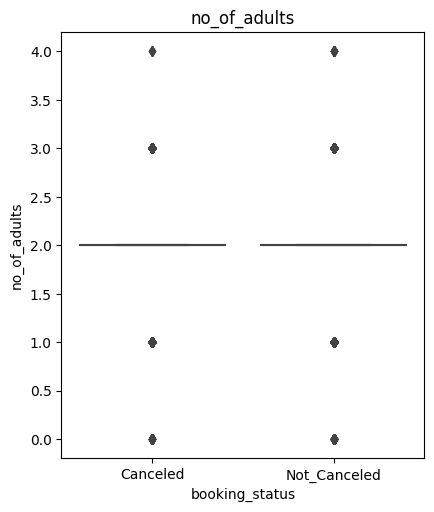

In [ ]:
cols = hr[['no_of_adults']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Both canceled and not_canceled have about the same number of adults.

### Booking_status vs "no_of_children"

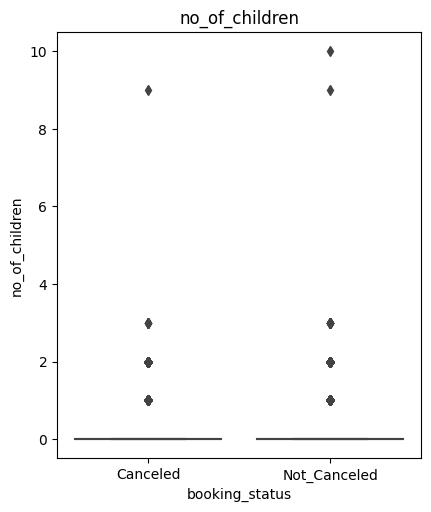

In [ ]:
cols = hr[['no_of_children']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Both values canceled and not_canceled have similar number of children in the reservations.
- Not_canceled has a slightly higher number of children in their reservations.

### Booking_status vs "no_of_weekend_nights"

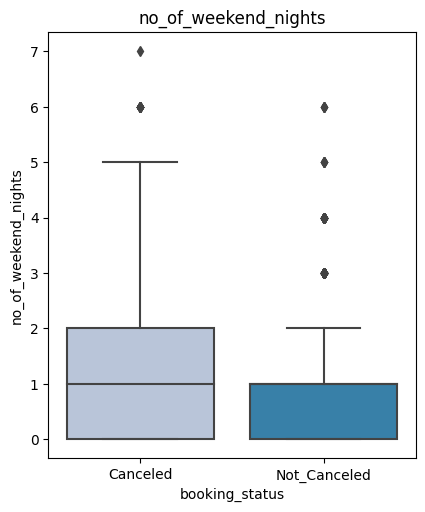

In [ ]:
cols = hr[['no_of_weekend_nights']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- The reservations of those that are canceled reserve a higher number nights on the weekend.
- The reservations that are not cancelled reserve a majority of 0-1 night during the weekend.

### Booking_status vs "no_of_week_nights"

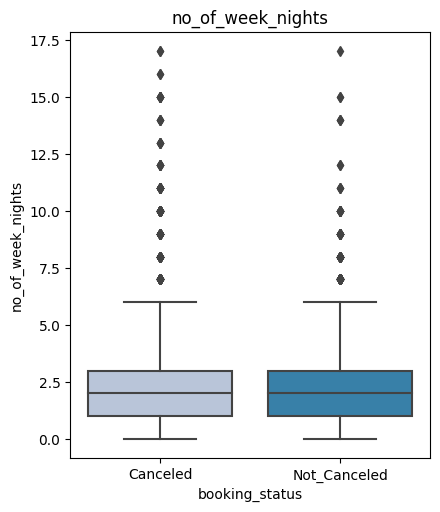

In [ ]:
cols = hr[['no_of_week_nights']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Guests make reservations of only 0-7 nights during the week do not cancel reservations.
- Guests who make reservations with a higher than 9 night stay cancel their reservations.

### Booking_status vs "required_car_parking_space"

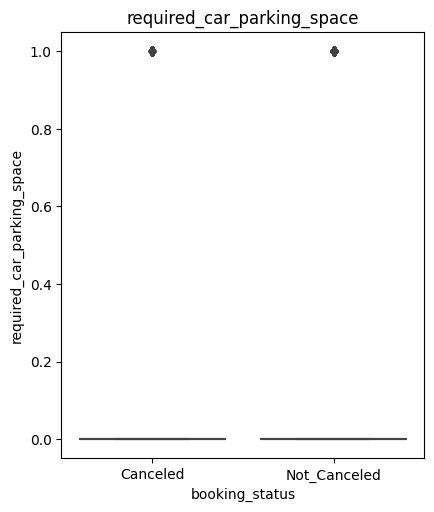

In [ ]:
cols = hr[['required_car_parking_space']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Both values canceled and not_canceled have similar number of guests who require a parking space.

### Booking_status vs "lead_time"

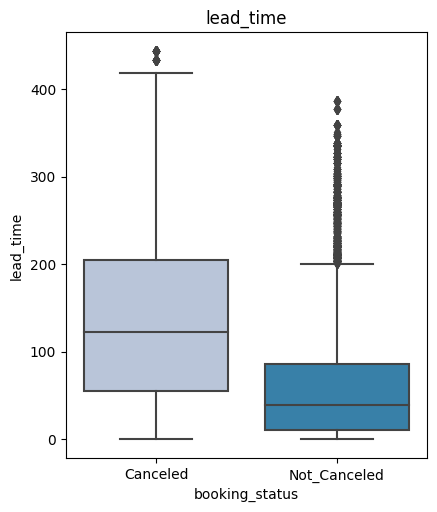

In [ ]:
cols = hr[['lead_time']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Guests who book with a larger lead time cancel their reservations.
- Guests who have smaller lead times do not cancel their reservations.
- Not_canceled have many outliers on the right side.

### Booking_status vs "arrival_year"

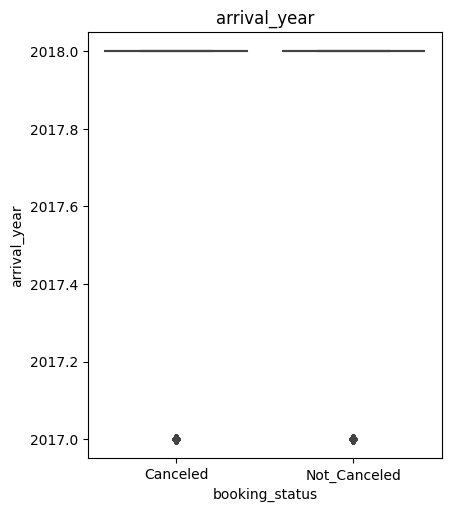

In [ ]:
cols = hr[['arrival_year']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Both values canceled and not_canceled have similar arrival years.
- Those who guests who book a year out tend to cancel their reservations.

### Booking_status vs "arrival_month"

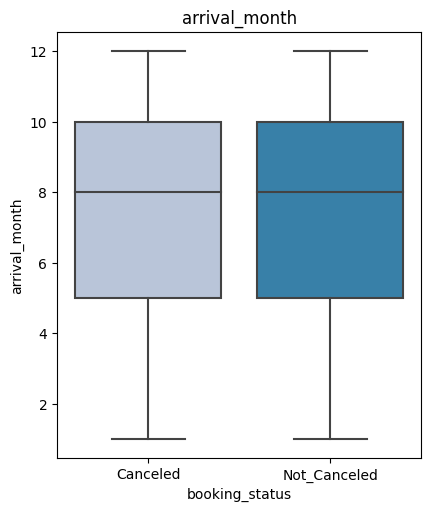

In [ ]:
cols = hr[['arrival_month']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Both values canceled and not_canceled have similar arrival months.
- Out of all months the 7th month has the most cancellations.

### Booking_status vs "arrival_date"

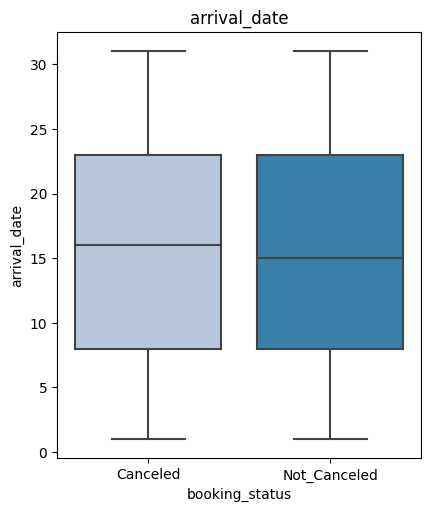

In [ ]:
cols = hr[['arrival_date']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Both values canceled and not_canceled have similar arrival dates.

### Booking_status vs "repeated_guest"

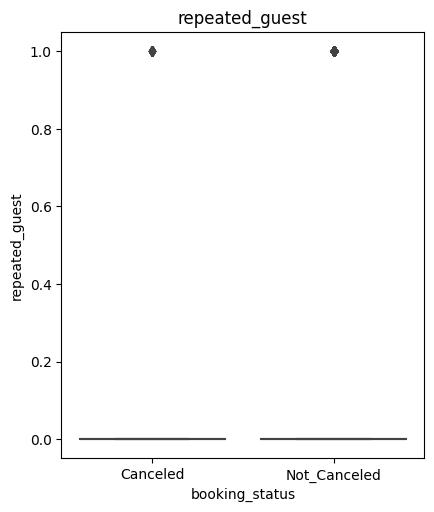

In [ ]:
cols = hr[['repeated_guest']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation
- Both values canceled and not_canceled have similar number of repeated guests.
- Guests who are new tend to cancel reservations.

### Booking_status vs "no_of_previous_cancellations"

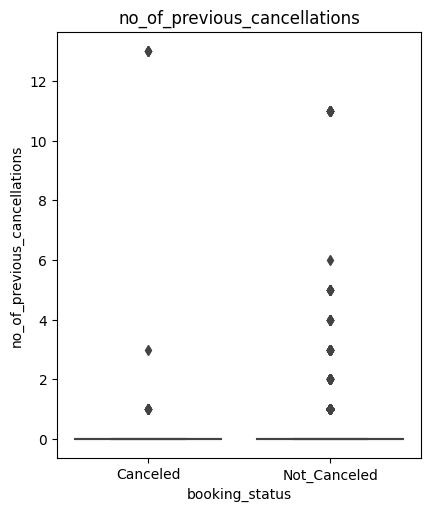

In [ ]:
cols = hr[['no_of_previous_cancellations']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Guests who have not_canceled have more number of previous cancellations.

### Booking_status vs "no_of_previous_bookings_not_canceled"

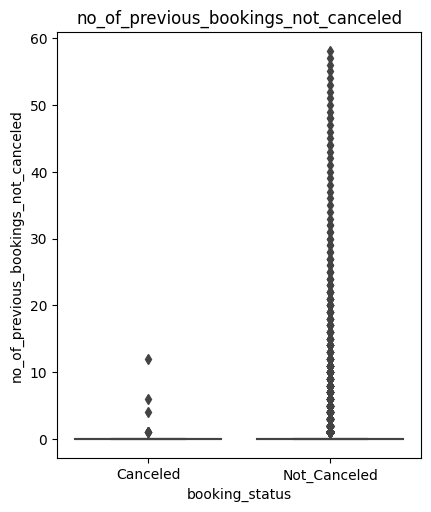

In [ ]:
cols = hr[['no_of_previous_bookings_not_canceled']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- There are a large number of reservations made by guests who have not canceled.
- There are a higher number of previous booking not canceled by the not canceled value.

### Booking_status vs "avg_price_per_room"

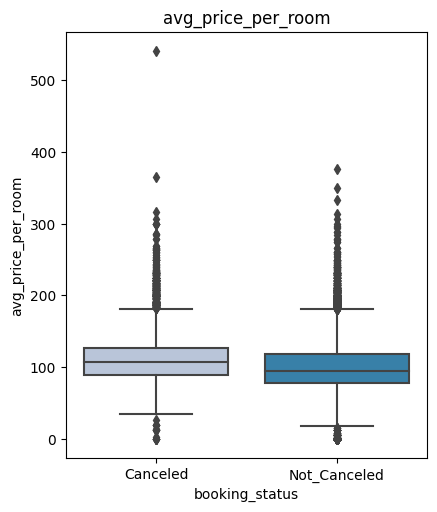

In [ ]:
cols = hr[['avg_price_per_room']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Obvervation:
- The guests who do not cancel reservation tend to get a better average price per room.
- The guests who cancel have higher rates in their room, there is one outlier in the canceled group.

### Booking_status vs "no_of_special_requests"

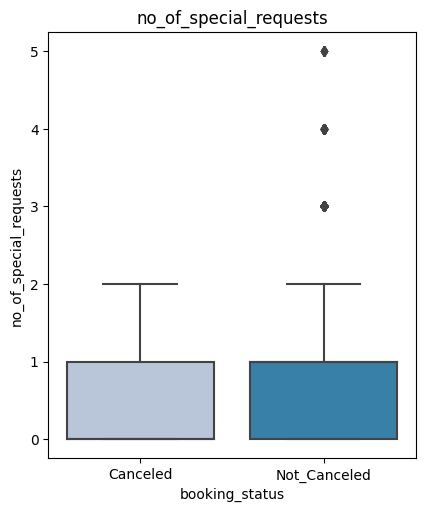

In [ ]:
cols = hr[['no_of_special_requests']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x=hr['booking_status'],y=hr[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Observation:
- Reservations of guests who have not canceled have a higher number of special requests.

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,hr['booking_status'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,hr['booking_status'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Booking_status vs "type_of_meal_plan"

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
Meal Plan 1            8679         19156  27835
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
Not Selected           1699          3431   5130
All                   11885         24390  36275
------------------------------------------------------------------------------------------------------------------------


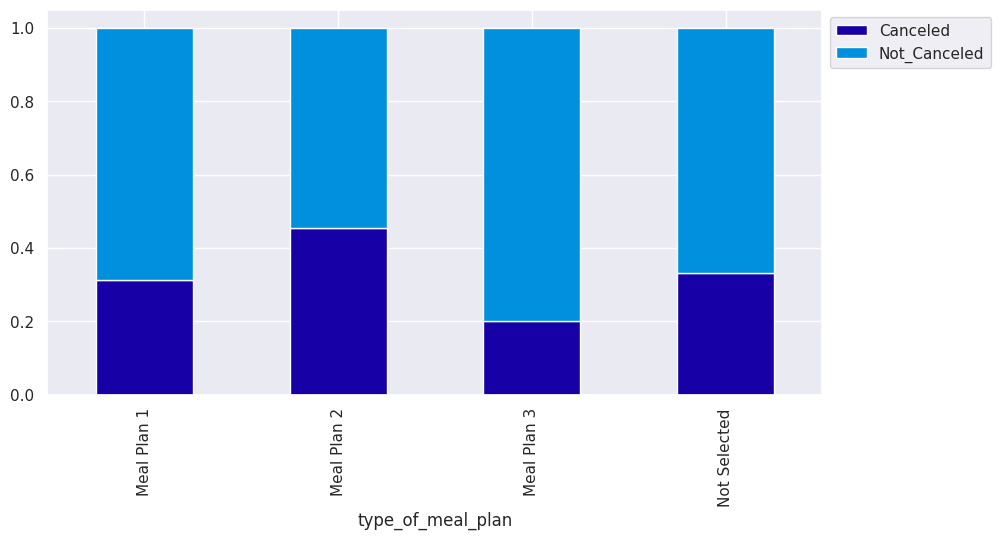

In [ ]:
stacked_plot(hr['type_of_meal_plan'])

#### Observation:
- The majority of guests who do not cancel reservations choose Meal Plan 1.
- The majority of guests who do cancel reservation choose Meal Plan 1.
- A large number of guests who do not cancel also do not select a meal plan.

### Booking_status vs "room_type_reserved"

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
Room_Type 1             9072         19058  28130
Room_Type 2              228           464    692
Room_Type 3                2             5      7
Room_Type 4             2069          3988   6057
Room_Type 5               72           193    265
Room_Type 6              406           560    966
Room_Type 7               36           122    158
All                    11885         24390  36275
------------------------------------------------------------------------------------------------------------------------


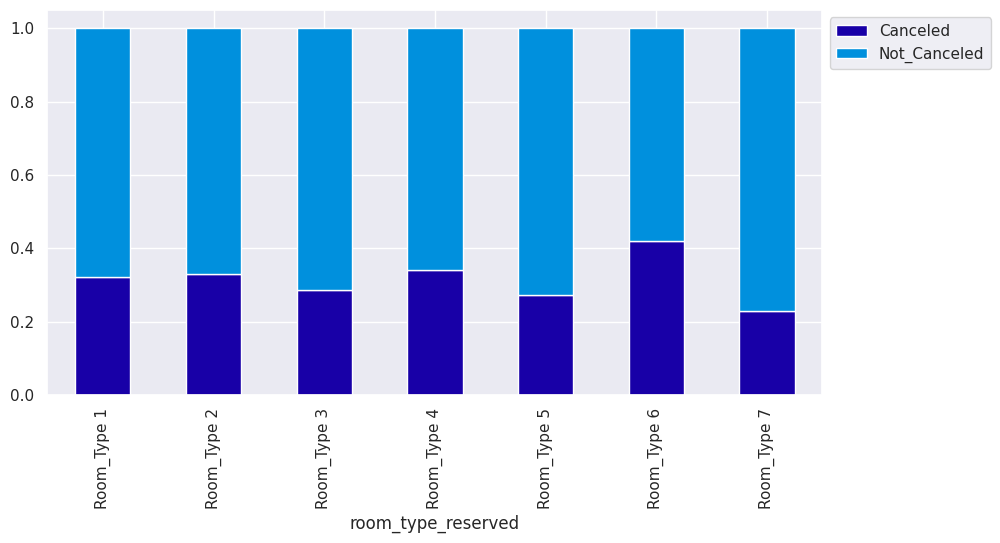

In [ ]:
stacked_plot(hr['room_type_reserved'])

#### Observation:
- The majority of reservations that are not canceled choose Room_Type 1.
- The majority of reservations that are canceled choose Room_Type 1.
- The second most booked room type for both canceled and non canceled is Room_Type 4.

### Booking_status vs "market_segment_type"

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
Aviation                   37            88    125
Complementary               0           391    391
Corporate                 220          1797   2017
Offline                  3153          7375  10528
Online                   8475         14739  23214
All                     11885         24390  36275
------------------------------------------------------------------------------------------------------------------------


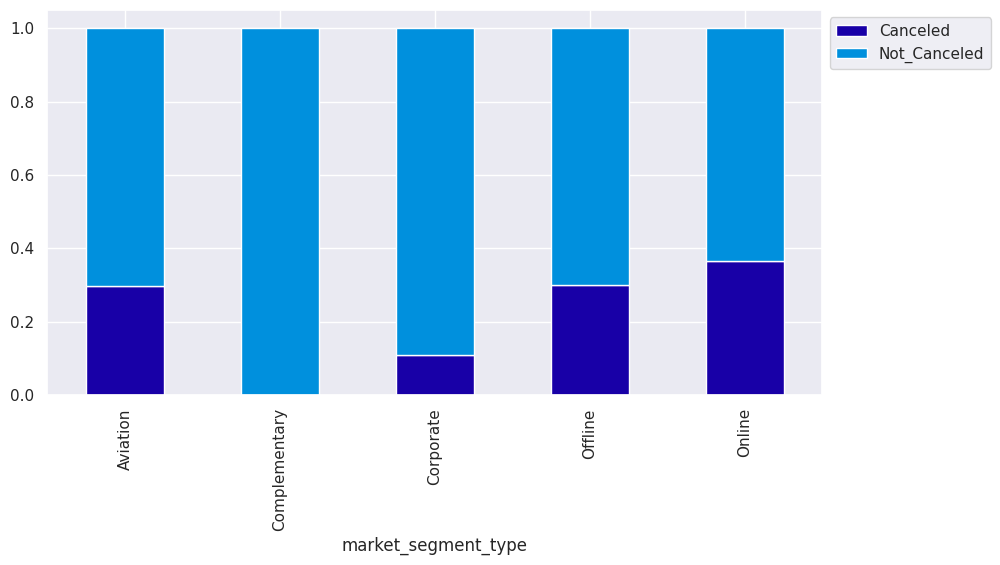

In [ ]:
stacked_plot(hr['market_segment_type'])

#### Observation:
- 100% of the Complementary reservations are not canceled.
- The majority of not canceled reservations are of online market segment type.
- Both canceled and not canceled have similar market segment counts based off their total.

# Data Pre-Processing

### Missing Values
- There are no missing values in this dataset.

### Check the target variable distribution 

In [ ]:
hr['booking_status'].value_counts(normalize = True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

### Handling non-numerical values (categorical)

In [ ]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    hr,
    columns=[
        "type_of_meal_plan",
        "room_type_reserved",
        "market_segment_type"
    ],
    drop_first=True,
)
dummy_data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                               0   
1             6               0  ...                               0   
2            28               0  ...                               0   
3            20               0  ...                               0   
4            11               0  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5 room_type_reserved_Room_Type 6  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 28 columns]

In [ ]:
column_names = list(dummy_data.columns)
column_names.remove(
    "booking_status"
)  

# Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


# Model Building Approach

1. Split the data into train and test set.
2. Train models on the training data.
3. Try to improve the model performance using hyperparameter tuning.
4. Test the performance on the test data.

## Splitting the Data

1. Define X and Y
2. Split dataset into training and test sets

In [ ]:
X = dummy_data.drop('booking_status', axis=1)
y = dummy_data['booking_status'].apply(lambda x : 0 if x=='Canceled' else 1 )

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(25392, 27) (10883, 27)


# Model Evaluation Criterion

## Examining the possible outcomes:

1. True Positives:
- The model predicts that a reservation will be canceled.
2. True Negatives:
- The model predicts that a reservation will NOT be canceled.
3. False Positives:
- The model predicts that a reservation will be canceled when it will NOT.
4. False Negatives:
- The model predicts that a reservation will NOT be canceled and it does get canceled.

### Model can make wrong predictions if:

- Predicting a reservation will be canceled by a guest when the reservation will NOT be canceled. (FP)
- Predicting a reservation will NOT be canceled by a guest when a reservation IS canceled. (FN)

### Which case is more important?

The most imporant is choise 2, (FN) If the model predicts a reservation will NOT be canceled, but the reservation is canceled, then the hotel will lose money.  Money will be lost by canceled reservation and additional unavailable rooms/dates for guests that would have not canceled. 

## Which metric is important to optimize?

- The Hotel will want Recall to be maximized, greater the Recall score, lesser are the chances of false negatives.

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Accuracy on training set :  0.9947227473219912
Accuracy on test set :  0.8610677202977121
Recall on training set :  0.9959585310138815
Recall on test set :  0.8898455651223179
Precision on training set :  0.9961919268849961
Precision on test set :  0.9021754191492309
F1-Score on training set :  0.996075215277371
F1-Score on test set :  0.8959680748589514


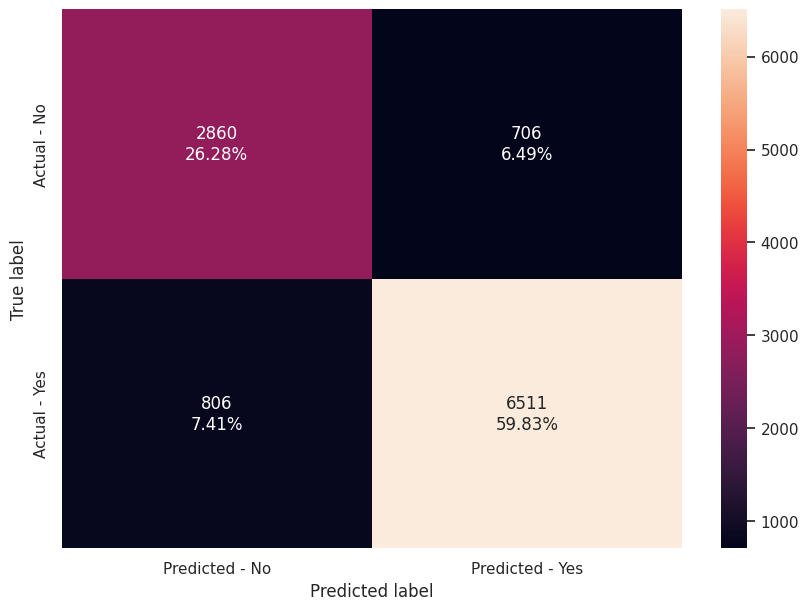

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

#### Observation:
- The decision tree is overfitting the data by .99% on the Recall training set.

### Hyperparameter Tuning

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.3,1:0.7},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

Accuracy on training set :  0.6723771266540642
Accuracy on test set :  0.6723329964164293
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6723771266540642
Precision on test set :  0.6723329964164293
F1-Score on training set :  0.8040974920522784
F1-Score on test set :  0.8040659340659341


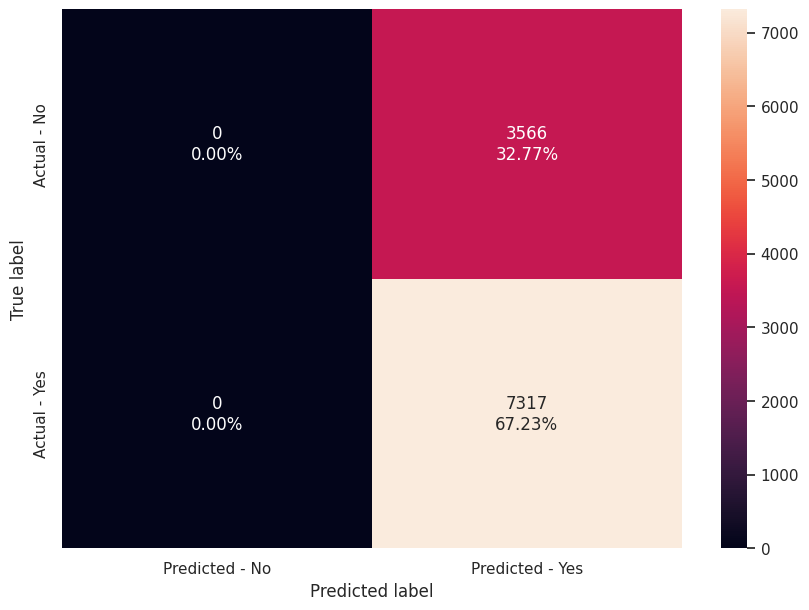

In [ ]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

#### Observation:
- Unfortunately now both Train and Test score for Recall is 100%.
- The model is overfitting. Let's try other models.

## Random Forest Classifier

Accuracy on training set :  0.9947227473219912
Accuracy on test set :  0.8964439952219058
Recall on training set :  0.9978328354712118
Recall on test set :  0.93986606532732
Precision on training set :  0.9943384112531373
Precision on test set :  0.9091750396615548
F1-Score on training set :  0.9960825586154476
F1-Score on test set :  0.9242658423493045


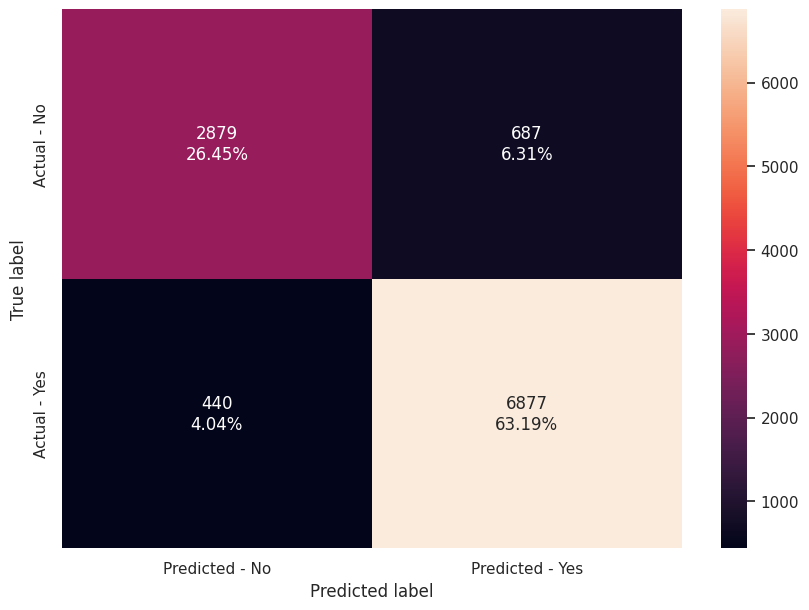

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

#### Observation:
- Train Recall score is overfitting.
- The Test Recall score is close to overfitting.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.3,1:0.7},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       max_features='log2', n_estimators=80, oob_score=True,
                       random_state=1)

Accuracy on training set :  0.7235349716446124
Accuracy on test set :  0.7253514655885326
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.7086290623832648
Precision on test set :  0.7099747719774888
F1-Score on training set :  0.8294709226060341
F1-Score on test set :  0.8303921012313453


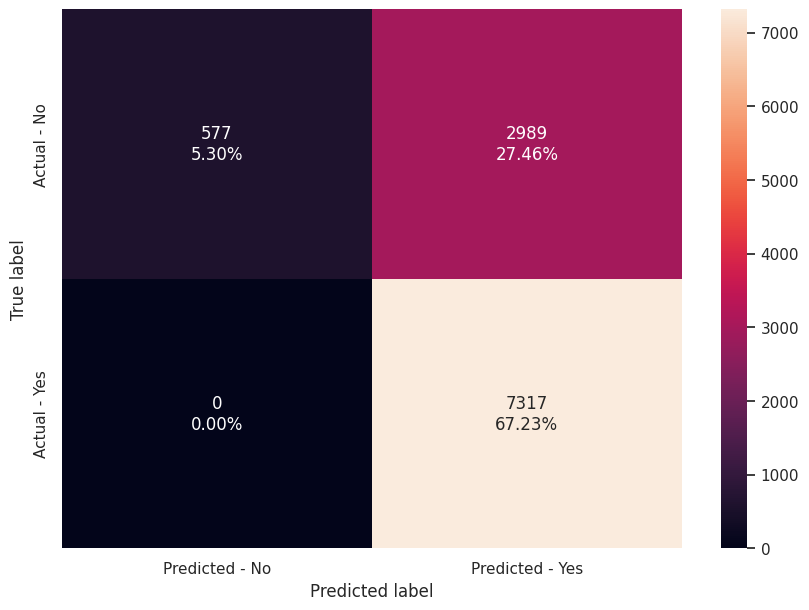

In [ ]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

#### Observation:
- The Recall Train and Test scores are overfitting.

## Bagging Classifier

Accuracy on training set :  0.9882640201638311
Accuracy on test set :  0.8806395295414867
Recall on training set :  0.9912727698705559
Recall on test set :  0.9099357660243269
Precision on training set :  0.9912727698705559
Precision on test set :  0.9123047410249383
F1-Score on training set :  0.9912727698705559
F1-Score on test set :  0.9111187136503592


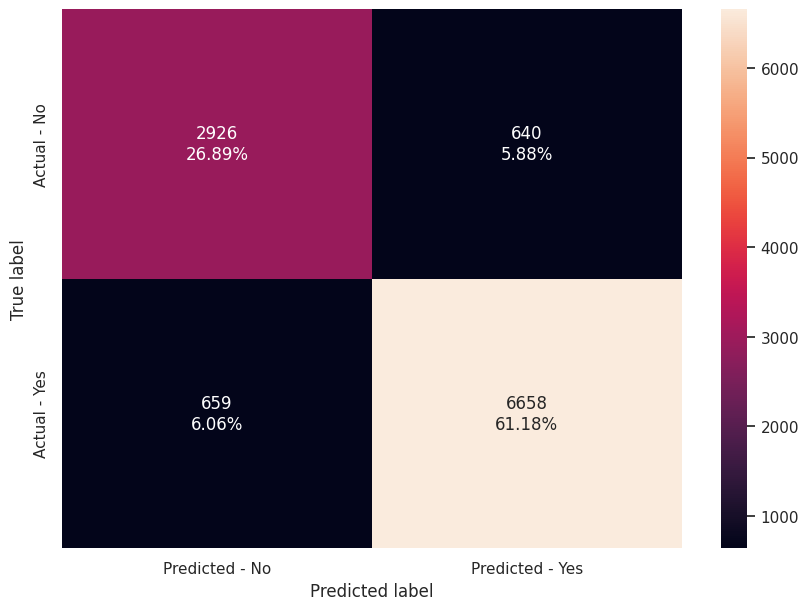

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

#### Observation:
- The Recall score for the Training set is overfitting.
- The Recall score for the Test set is .90% which is not bad.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

Accuracy on training set :  0.3276228733459357
Accuracy on test set :  0.3276670035835707
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0
F1-Score on training set :  0.0
F1-Score on test set :  0.0


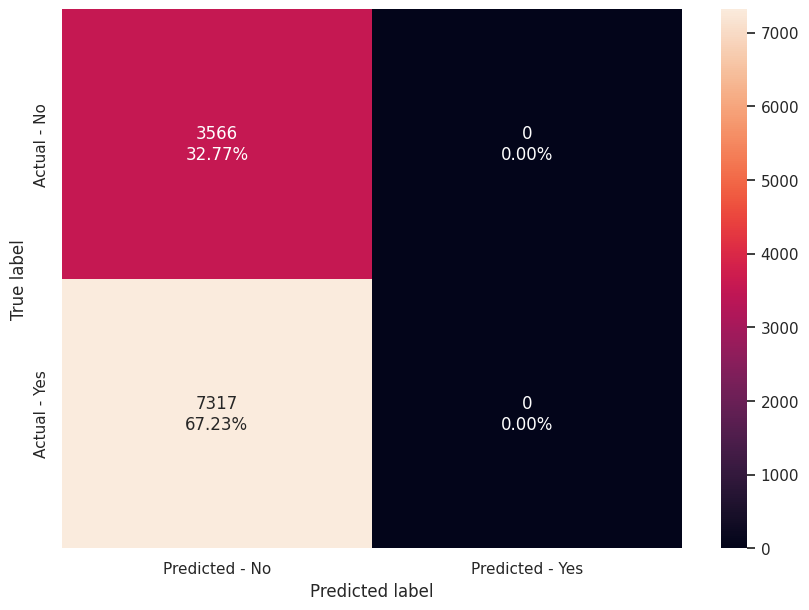

In [ ]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

#### Observation:
- The Scores are all 0 which is not a good model.
- We will try more models.

### Boosting Models

## AdaBoost Classifier

Accuracy on training set :  0.8215973534971645
Accuracy on test set :  0.8188918496738031
Recall on training set :  0.8898846131318456
Recall on test set :  0.8845155118217849
Precision on training set :  0.8514823740402399
Precision on test set :  0.8518031060805475
F1-Score on training set :  0.8702600526979035
F1-Score on test set :  0.8678511565538048


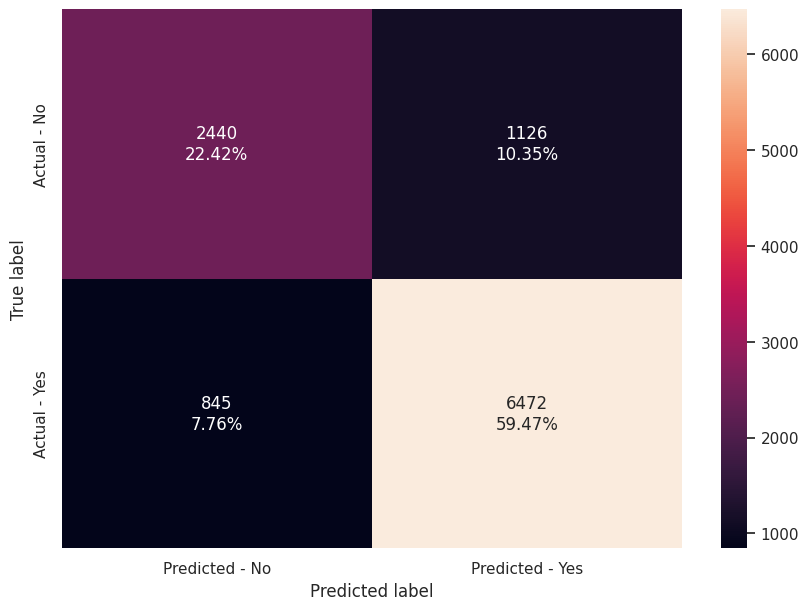

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

#### Observation:
- The Recall score for the Train and Test sets have both good scores.
- The scores of ~.88% - .89% are very good, lets try hyperparameter turning to see if the scores can improve.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=70, random_state=1)

Accuracy on training set :  0.8881537492123504
Accuracy on test set :  0.8683267481392998
Recall on training set :  0.9293035787500732
Recall on test set :  0.9123957906245729
Precision on training set :  0.9066803817360992
Precision on test set :  0.8939475093733262
F1-Score on training set :  0.9178525974777276
F1-Score on test set :  0.9030774433547516


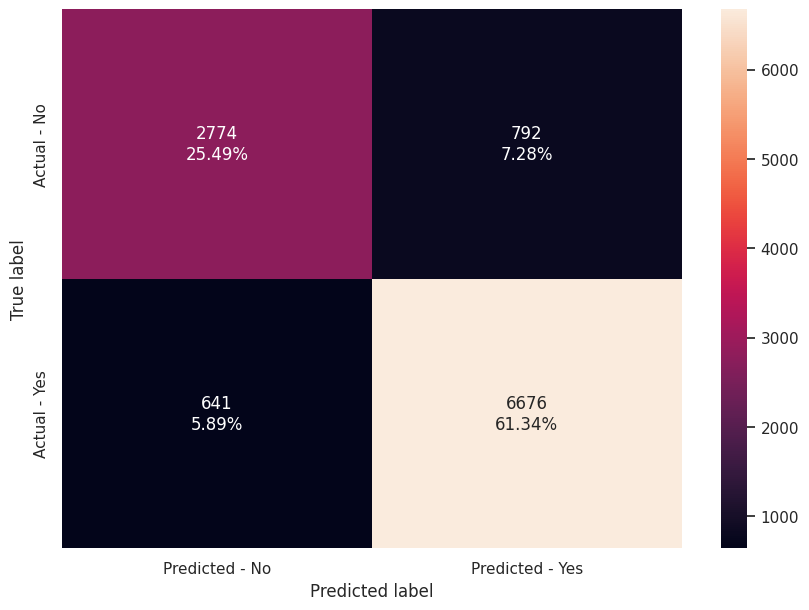

In [ ]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

#### Observation:
- Great, the scores for Recall Train and Test set did improve.
- The Recall score on training set is ~0.93% and the test set is ~0.91%.
- Good improvement and the model is not overfitting.

## Gradient Boosting Classifier

Accuracy on training set :  0.856017643352237
Accuracy on test set :  0.848571166038776
Recall on training set :  0.9301235869501552
Recall on test set :  0.9199125324586579
Precision on training set :  0.8657253448181867
Precision on test set :  0.8637238547414346
F1-Score on training set :  0.8967698215495821
F1-Score on test set :  0.8909331568497684


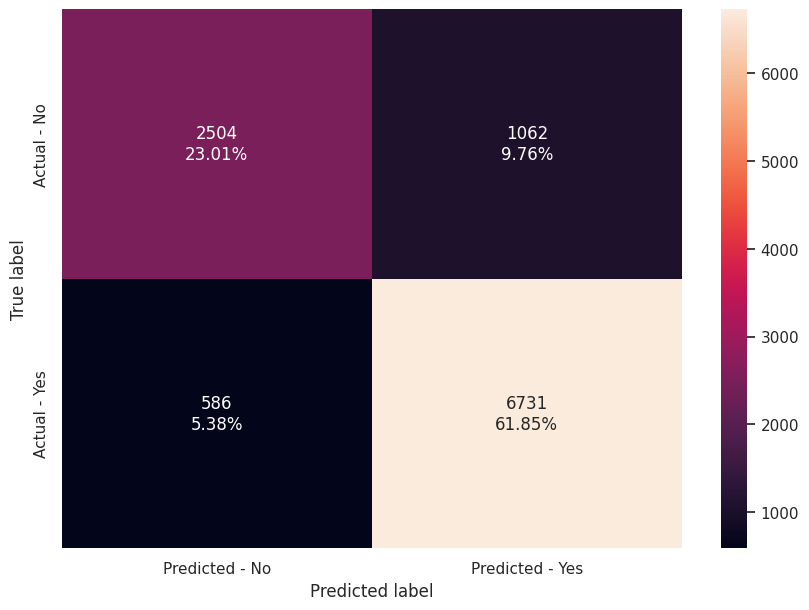

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

#### Observation:
- Scores of Recall for both Train and Test sets are similar to those of the Ada Boosting Tuned model.
- Recall Score: Training set is ~0.93% and Test set is ~0.92%.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

Accuracy on training set :  0.8057262129804663
Accuracy on test set :  0.8037305889920059
Recall on training set :  0.9601710302817313
Recall on test set :  0.9531228645619789
Precision on training set :  0.7940036811004553
Precision on test set :  0.795483061480552
F1-Score on training set :  0.8692171054375778
F1-Score on test set :  0.8671972146232281


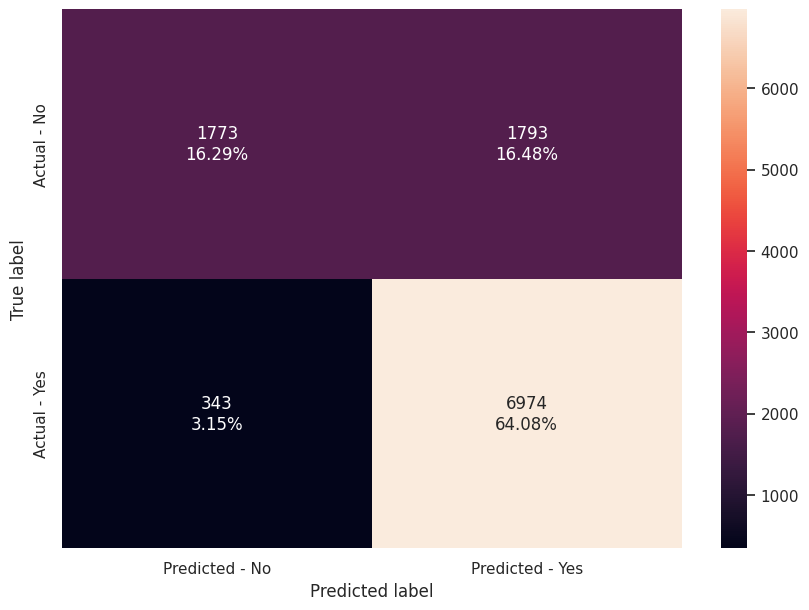

In [ ]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

#### Observation:
- The Tuned Gradient Boosting model scores for recall improved.
- The Training set Recall score improved to ~0.96 and the Test set Recall score to ~0.95.

## XGBoost Classifier

Accuracy on training set :  0.9218257718966604
Accuracy on test set :  0.8887255352384453
Recall on training set :  0.9598781702102736
Recall on test set :  0.9353560202268689
Precision on training set :  0.9265038444142921
Precision on test set :  0.902664204695331
F1-Score on training set :  0.9428957739995971
F1-Score on test set :  0.9187193771394053


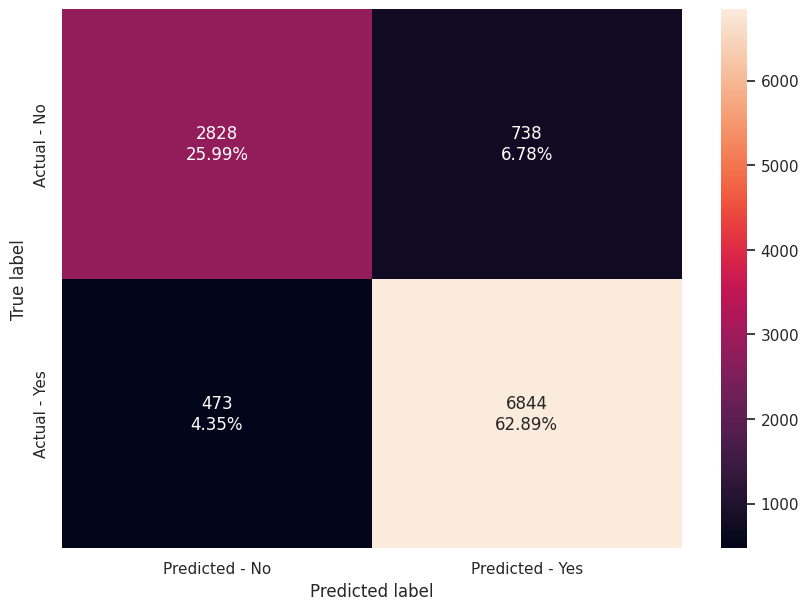

In [ ]:
#Model gave an error "ValueError: feature_names must be string, and may not contain [, ] or <"
#Found on Google the following solution: (Citation: Yaqi Li, https://stackoverflow.com/a/56211072)
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

#### Observation:
- The XGBoost model with default parameters has good recall scores.
- The Recall scores for Training set is ~0.96% and Test is ~0.94.
- These are good scores.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Accuracy on training set :  0.6934073724007561
Accuracy on test set :  0.6939263070844436
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6868211440984794
Precision on test set :  0.6871712997746056
F1-Score on training set :  0.8143378407383558
F1-Score on test set :  0.8145839131644865


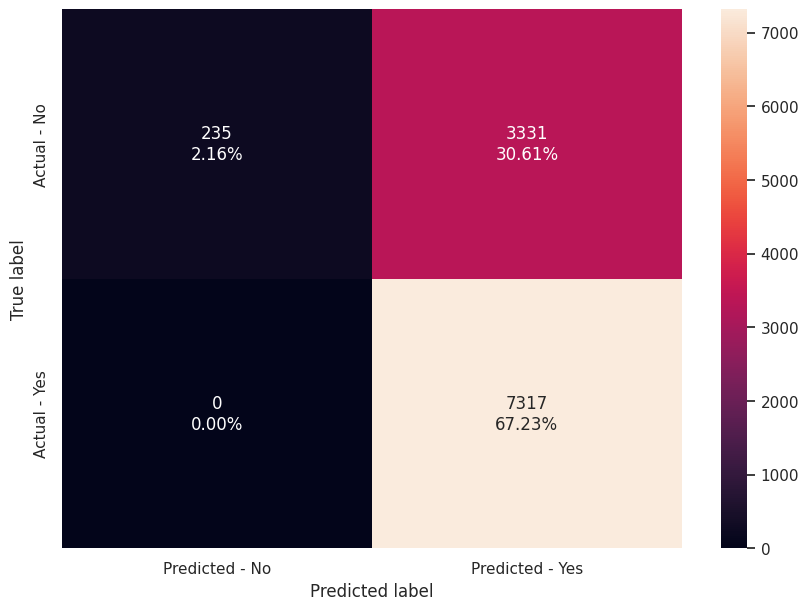

In [ ]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

#### Observation:
- When trying to improve the Recall score for the XGBoost model the model have us 100%.
- This means that the model is overfitting.

## Stacking Classifier

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.3,
                                                                     1: 0.7},
                                                       max_depth=5,
                                                       max_features='log2',
                                                       n_estimators=80,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=1,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(cla...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=10, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Accuracy on training set :  0.7904458097038437
Accuracy on test set :  0.7893044197372048
Recall on training set :  0.9956070989281322
Recall on test set :  0.994259942599426
Precision on training set :  0.7641611221003417
Precision on test set :  0.7636993491496956
F1-Score on training set :  0.8646641401938092
F1-Score on test set :  0.8638603574185122


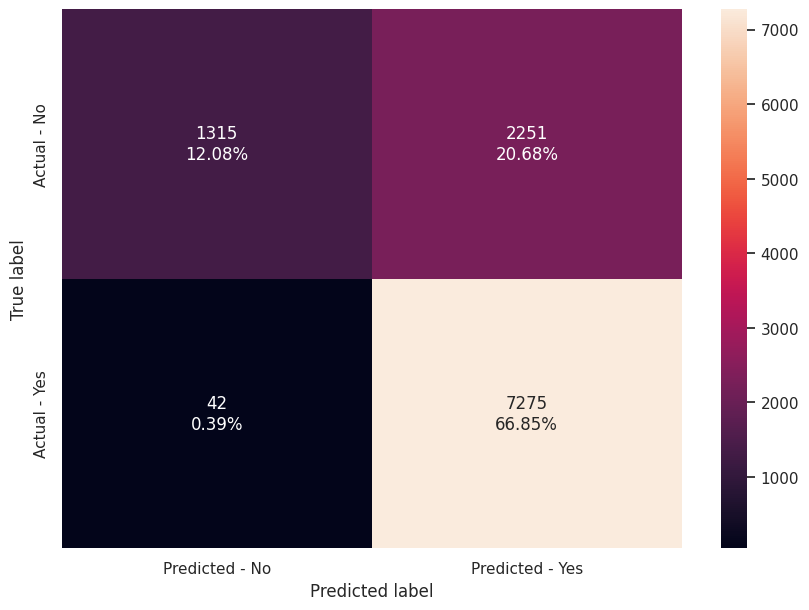

In [ ]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

#### Observation:
- Unfortunately the Recall score for the Training and Test sets are overfitting.

## Comparing all models

In [ ]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
1                  Tuned Decision Tree        0.672377       0.672333   
3                  Tuned Random Forest        0.723535       0.725351   
11            Tuned XGBoost Classifier        0.693407       0.693926   
12                 Stacking Classifier        0.790446       0.789304   
9   Tuned Gradient Boosting Classifier        0.805726       0.803731   
2                        Random Forest        0.994723       0.896444   
10                  XGBoost Classifier        0.921826       0.888726   
8         Gradient Boosting Classifier        0.856018       0.848571   
7            Tuned AdaBoost Classifier        0.888154       0.868327   
4                   Bagging Classifier        0.988264       0.880640   
0                        Decision Tree        0.994723       0.861068   
6                  AdaBoost Classifier        0.821597       0.818892   
5             Bagging Classifier Tuned        0.327623       0.327667   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
1       1.000000     1.000000         0.672377        0.672333   
3       1.000000     1.000000         0.708629        0.709975   
11      1.000000     1.000000         0.686821        0.687171   
12      0.995607     0.994260         0.764161        0.763699   
9       0.960171     0.953123         0.794004        0.795483   
2       0.997833     0.939866         0.994338        0.909175   
10      0.959878     0.935356         0.926504        0.902664   
8       0.930124     0.919913         0.865725        0.863724   
7       0.929304     0.912396         0.906680        0.893948   
4       0.991273     0.909936         0.991273        0.912305   
0       0.995959     0.889846         0.996192        0.902175   
6       0.889885     0.884516         0.851482        0.851803   
5       0.000000     0.000000         0.000000        0.000000   

    Train_F1-Score  Test_F1-Score  
1         0.804097       0.804066  
3         0.829471       0.830392  
11        0.814338       0.814584  
12        0.864664       0.863860  
9         0.869217       0.867197  
2         0.996083       0.924266  
10        0.942896       0.918719  
8         0.896770       0.890933  
7         0.917853       0.903077  
4         0.991273       0.911119  
0         0.996075       0.895968  
6         0.870260       0.867851  
5         0.000000       0.000000

#### Observation:
- We cannot choose Tuned Decision Tree, Tuned Random Forest and Tuned XGBoost Classifier they are 100%.
- We cannot choose the above three models because the models are overfitting the data.
- Stacking Classifier is also overtting with a score of 0.99%.
- Finally we see the Tuned Gradient Boosting Classifier which has a good Recall Score on the train and test sets.
- Also the difference between the Train and Test Recall scores is minimal.
- The Tuned Gradient Boosting Classifier is the better model.

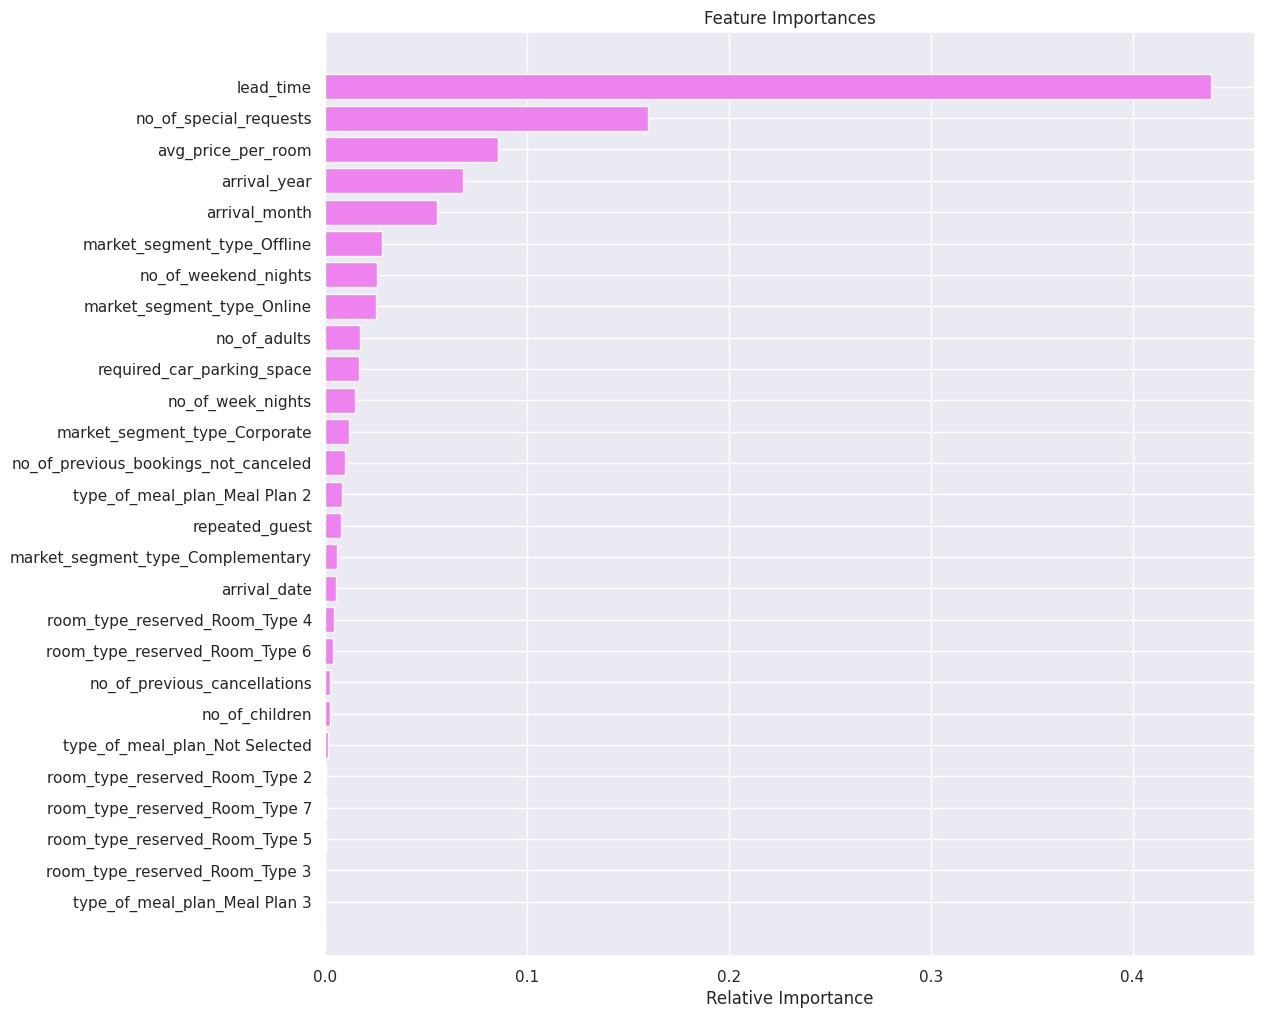

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation:
- The most important feature in identifying those revervations that will be canceled is lead_time.
- The longer the lead_time the most likely the reservation will be canceled.
- The other important feaures are no_of_special_requests, avg_prive_per_room, arrival_year, arrival_month and market_segment_offline.

# Conclusion

1. We can say that those reservations that are likely to be canceled by potential guests have the following features in comparison to the reservations that will NOT be canceled:
    - Lead_time, if a reservation is made with a longer lead time, greater than ~100 days, the reservation has a greater chance of being canceled.
    - No_of_special_requests, the less number of requests the more likely a reservation could be canceled. The higher number of requests the less likely a reservations will be canceled. 
    - Avg_price_per_room, the greater the price of a room the more likely a reservation will be canceled.
    - Arrival_year, reservations for a following year in this case 2018 are more likely to be canceled. 
    - Arrival_month, if the expected arrival month is between June(6) and October(10) there is a high chance the reservation will be canceled. There is a higher chance if the reservation is made for the month of October.
    - Market_segment_offline, if a reservation is made based off offline markerting the reservation will be canceled. 
2. Longer lead time, low number of special requests, high average room price, late arrival year and month and resercation made based on offline marketing is a combination of a reservation that will very likely be canceled.
3. The hotel should keep an eye out for those reservations that are made under the previously mentioned parameters.
4. These reservations made with those parameters can be flagged and possibly ask for a deposit while making the reservation.
5. Based on the results of our models' comparison, the Tuned Gradient Boosting Classifier can be used to identify those reservations that will be canceled.